## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Display Settings

In [2]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

pd.options.display.float_format = '{:,.2f}'.format

## 2. Loading Data

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0   24,000.00            Verified  Dec-11   Fully Paid          n   
1   30,000.00     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   
1    309xx         GA  1.00            0           Apr-99               5   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         3        0   
1                     NaN                     NaN         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   
1       1687      9.40%          4                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00     5,863.16         5,833.84         5,000.00   
1           0.00     1,008.71         1,008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                        0.00                          NaN            1   
1                        0.00                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0               0           NaN          NaN          NaN         NaN   
1               0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          NaN           NaN                   NaN          NaN   
1          NaN           NaN                   NaN          NaN   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             NaN      NaN                      0.00            0   
1             NaN      NaN                      0.00            0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0    

### 2.1 Understanding the DataFrame

In [5]:
df.shape

(39717, 111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Understanding the statistical metrics of numerical data columns

df.describe()

id    member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count    39,717.00    39,717.00  39,717.00    39,717.00        39,717.00   
mean    683,131.91   850,463.56  11,219.44    10,947.71        10,397.45   
std     210,694.13   265,678.31   7,456.67     7,187.24         7,128.45   
min      54,734.00    70,699.00     500.00       500.00             0.00   
25%     516,221.00   666,780.00   5,500.00     5,400.00         5,000.00   
50%     665,665.00   850,812.00  10,000.00     9,600.00         8,975.00   
75%     837,755.00 1,047,339.00  15,000.00    15,000.00        14,400.00   
max   1,077,501.00 1,314,167.00  35,000.00    35,000.00        35,000.00   

       installment   annual_inc       dti  delinq_2yrs  inq_last_6mths  \
count    39,717.00    39,717.00 39,717.00    39,717.00       39,717.00   
mean        324.56    68,968.93     13.32         0.15            0.87   
std         208.87    63,793.77      6.68         0.49            1.07   
min          15.69     4,000.00      0.00         0.00            0.00   
25%         167.02    40,404.00      8.17         0.00            0.00   
50%         280.22    59,000.00     13.40         0.00            1.00   
75%         430.78    82,300.00     18.60         0.00            1.00   
max       1,305.19 6,000,000.00     29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc   pub_rec  \
count               14,035.00                2,786.00 39,717.00 39,717.00   
mean                    35.90                   69.70      9.29      0.06   
std                     22.02                   43.82      4.40      0.24   
min                      0.00                    0.00      2.00      0.00   
25%                     18.00                   22.00      6.00      0.00   
50%                     34.00                   90.00      9.00      0.00   
75%                     52.00                  104.00     12.00      0.00   
max                    120.00                  129.00     44.00      4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count  39,717.00  39,717.00  39,717.00      39,717.00    39,717.00   
mean   13,382.53      22.09      51.23          50.99    12,153.60   
std    15,885.02      11.40     375.17         373.82     9,042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%     3,703.00      13.00       0.00           0.00     5,576.93   
50%     8,850.00      20.00       0.00           0.00     9,899.64   
75%    17,058.00      29.00       0.00           0.00    16,534.43   
max   149,588.00      90.00   6,311.47       6,307.37    58,563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count        39,717.00        39,717.00      39,717.00           39,717.00   
mean         11,567.15         9,793.35       2,263.66                1.36   
std           8,942.67         7,065.52       2,608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%           5,112.31         4,600.00         662.18                0.00   
50%           9,287.15         8,000.00       1,348.91                0.00   
75%          15,798.81        13,653.26       2,833.40                0.00   
max          58,563.68        35,000.02      23,563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count   39,717.00                39,717.00        39,717.00   
mean        95.22                    12.41         2,678.83   
std        688.74                   148.67         4,447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00         3,293.16   
max     29,623.35                 7,002.19        36,115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  poli

-  By seeing the count metric, it is understood that some columns are completely empty. 
-  In the next step, we will look into the missing values in each column and, accordingly, make a decision whether to drop the column or impute the missing values.

In [8]:
# Checking if there are any duplicate values

df[df.duplicated()].shape

(0, 111)

`There are no duplicate rows present in the dataframe`

## 2.2 Identify Redundant Data

In [9]:
# Percentage of Missing values in each column

df_null_per = df.isnull().mean() * 100
df_null_per

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.59
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [10]:
# Total number of columns that have at least one missing value

len(list(df.columns[df.isnull().any()]))

68

In [11]:
# First, we will remove any columns that contain over 40% missing values. 
# This is because handling such a significant amount of missing data is not feasible for imputation, and eliminating 
# too many rows is also impractical, as it would result in a substantial loss of valuable data and potentially biased insights.

df_null_m40 = list(df_null_per[df_null_per > 40].index)
df_null_m40

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [12]:
len(df_null_m40)

57

In [13]:
# Creating a new dataframe and loading those columns that have less than 40% of missing values

df1 = df.drop(df_null_m40, axis=1)

In [14]:
# Shape of new dataframe is 

print('The shape of new dataframe is', df1.shape)

The shape of new dataframe is (39717, 54)


In [15]:
# Understanding the statistical metrics of numerical data columns in the new dataframe

df1.describe()

id    member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count    39,717.00    39,717.00  39,717.00    39,717.00        39,717.00   
mean    683,131.91   850,463.56  11,219.44    10,947.71        10,397.45   
std     210,694.13   265,678.31   7,456.67     7,187.24         7,128.45   
min      54,734.00    70,699.00     500.00       500.00             0.00   
25%     516,221.00   666,780.00   5,500.00     5,400.00         5,000.00   
50%     665,665.00   850,812.00  10,000.00     9,600.00         8,975.00   
75%     837,755.00 1,047,339.00  15,000.00    15,000.00        14,400.00   
max   1,077,501.00 1,314,167.00  35,000.00    35,000.00        35,000.00   

       installment   annual_inc       dti  delinq_2yrs  inq_last_6mths  \
count    39,717.00    39,717.00 39,717.00    39,717.00       39,717.00   
mean        324.56    68,968.93     13.32         0.15            0.87   
std         208.87    63,793.77      6.68         0.49            1.07   
min          15.69     4,000.00      0.00         0.00            0.00   
25%         167.02    40,404.00      8.17         0.00            0.00   
50%         280.22    59,000.00     13.40         0.00            1.00   
75%         430.78    82,300.00     18.60         0.00            1.00   
max       1,305.19 6,000,000.00     29.99        11.00            8.00   

       open_acc   pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv  \
count 39,717.00 39,717.00  39,717.00  39,717.00  39,717.00      39,717.00   
mean       9.29      0.06  13,382.53      22.09      51.23          50.99   
std        4.40      0.24  15,885.02      11.40     375.17         373.82   
min        2.00      0.00       0.00       2.00       0.00           0.00   
25%        6.00      0.00   3,703.00      13.00       0.00           0.00   
50%        9.00      0.00   8,850.00      20.00       0.00           0.00   
75%       12.00      0.00  17,058.00      29.00       0.00           0.00   
max       44.00      4.00 149,588.00      90.00   6,311.47       6,307.37   

       total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count    39,717.00        39,717.00        39,717.00      39,717.00   
mean     12,153.60        11,567.15         9,793.35       2,263.66   
std       9,042.04         8,942.67         7,065.52       2,608.11   
min           0.00             0.00             0.00           0.00   
25%       5,576.93         5,112.31         4,600.00         662.18   
50%       9,899.64         9,287.15         8,000.00       1,348.91   
75%      16,534.43        15,798.81        13,653.26       2,833.40   
max      58,563.68        58,563.68        35,000.02      23,563.68   

       total_rec_late_fee  recoveries  collection_recovery_fee  \
count           39,717.00   39,717.00                39,717.00   
mean                 1.36       95.22                    12.41   
std                  7.29      688.74                   148.67   
min                  0.00        0.00                     0.00   
25%                  0.00        0.00                     0.00   
50%                  0.00        0.00                     0.00   
75%                  0.00        0.00                     0.00   
max                180.20   29,623.35                 7,002.19   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count        39,717.00                   39,661.00    39,717.00   
mean          2,678.83                        0.00         1.00   
std           4,447.14                        0.00         0.00   
min               0.00                        0.00         1.00   
25%             218.68                        0.00         1.00   
50%             546.14                        0.00         1.00   
75%           3,293.16                        0.00         1.00   
max          36,115.20                        0.00         1.00   

       acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count       39,717.00                 39,661.00    39,717.00   
mea

`By seeing the above stat metrics, we understood that there are some columns that have the same minimum and maximum values, or, we can say, there is only one value.`

In [16]:
df1.shape

(39717, 54)

In [17]:
# making a numerical and categorical variable for further analysis

num_col = list(df1.select_dtypes(['int','float']).columns)
cat_col = list(df1.select_dtypes(['object']).columns)

In [18]:
len(num_col) + len(cat_col)

54

In [19]:
# identifying those numerical columns that have a zero standard deviation

df1_std = df1[num_col].std(axis=0)
single_val_num_col = list(df1_std[(df1_std==0)].index)

In [20]:
single_val_num_col

['collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [21]:
# As these numerical columns contain only one value, these columns will not give us any insights. 
#Hence, dropping these columns

df1.drop(single_val_num_col, axis=1, inplace=True)

In [22]:
df1.shape

(39717, 48)

In [23]:
# identifying those categorical columns that have a single value

df1_single = df1[cat_col].nunique()
single_val_cat_col = list(df1_single[(df1_single==1)].index)

In [24]:
single_val_cat_col

['pymnt_plan', 'initial_list_status', 'application_type']

In [25]:
# As these categorical columns contain only one value, these columns will not give us any insights. 
# Hence, dropping these columns

df1.drop(single_val_cat_col, axis=1, inplace=True)

In [26]:
df1.shape

(39717, 45)

### 2.2.1 understanding the columns from a domain perspective and deleting those that are not necessary for the analysis.

In [27]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
df1.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status issue_d loan_status  \
0   24,000.00            Verified  Dec-11  Fully Paid   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   

   open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
0         3        0      13648     83.70%          9       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00     5,863.16         5,833.84         5,000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                  0.00

In [29]:
xtra_columns = ['id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','url', 'desc','title', 'zip_code',
       'total_acc','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','last_pymnt_d','revol_bal','recoveries',
       'total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d']

`Our understanding of those columns and why they are not required`
-  id and member_id are for identification purposes only; hence, they are not driving factors for 'Loan Default'
-  loan_amnt and funded_amnt are highly collerated, so droping funded_amnt
-  Inverstor details are not needed for this analysis, hence dropping those columns related to investors.
-  url and desc are extra information we have but not very useful for analysis.
-  emp_title is not a strong indicator of 'Loan Default' as there are 28,820 unique values in it.
-  The title and purpose columns have similar information, but the purpose column has more structured data, hence dropping the title column.
-  Zip_code is the extra info hence not needed analysis.
-  open_acc and total_acc have similar information; as we are going with the current situation, we would like to retain open_acc.
-  The remaining columns in the list don't make any sense as they are not driving factors of 'Loan Default' and they are more of the post-loan approval information.

In [30]:
# Dropping extra columns from the dataframe as these will not any value add

df1.drop(xtra_columns, axis=1, inplace=True)

In [31]:
print('The shape of the dataframe after dropping extra columns', df1.shape)

The shape of the dataframe after dropping extra columns (39717, 22)


### 2.2.2 Missing Values Treatment

In [32]:
# Missing values percentage in each column

df1_null_per = df1.isnull().mean() * 100


In [33]:
# columns with Null value percentage more than zero (mtz) in the new dataframe

df1_null_mtz = list(df1_null_per[df1_null_per > 0].index)
df1_null_mtz

['emp_length', 'revol_util', 'pub_rec_bankruptcies']

##### emp_length

In [34]:
df1.emp_length.isnull().sum()

1075

In [35]:
df1.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [36]:
# Imputing the missing values with the mode

df1.emp_length = df1.emp_length.fillna(df1.emp_length.mode()[0])

In [37]:
df1.emp_length.isnull().sum()

0

##### revol_util

In [38]:
df1.revol_util.isnull().sum()

50

In [39]:
df1.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [40]:
# Imputing the missing values with the mode

df1.revol_util = df1.revol_util.fillna(df1.revol_util.mode()[0])

In [41]:
df1.revol_util.isnull().sum()

0

##### pub_rec_bankruptcies

In [42]:
df1.pub_rec_bankruptcies.isnull().sum()

697

In [43]:
df1.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64

In [44]:
# Imputing the missing values with the mode

df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.fillna(df1.pub_rec_bankruptcies.median())

In [45]:
df1.revol_util.isnull().sum()

0

In [46]:
# Checking the null values in all the columns again

df1.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
pub_rec_bankruptcies    0
dtype: int64

` All the missing values and data reduncies have been treated`

### 2.2.3 Standardizing the data

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            39717 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  addr_state            39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  delinq_2yrs        

In [48]:
rem_per = lambda x : float(x.replace('%',''))

In [49]:
df1.int_rate = df1.int_rate.apply(rem_per)
df1.revol_util = df1.revol_util.apply(rem_per)

In [50]:
df1.head(2)

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   

       purpose addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  credit_card         AZ 27.65            0           Jan-85               1   
1          car         GA  1.00            0           Apr-99               5   

   open_acc  pub_rec  revol_util  pub_rec_bankruptcies  
0         3        0       83.70                  0.00  
1         3        0        9.40                  0.00

In [51]:
# Verifying home owner ship column

df1.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [52]:
# As there are only there none values, we will replce those with other category

df1.home_ownership = df1.home_ownership.apply(lambda x : x.replace('NONE','OTHER'))

In [53]:
df1.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: count, dtype: int64

### 2.2.4 Outliers Analysis

In [54]:
# executing the below codes again as we have updated the dataframe

num_col = list(df1.select_dtypes(['int','float']).columns)
cat_col = list(df1.select_dtypes(['object']).columns)

In [55]:
len(num_col) + len(cat_col)

22

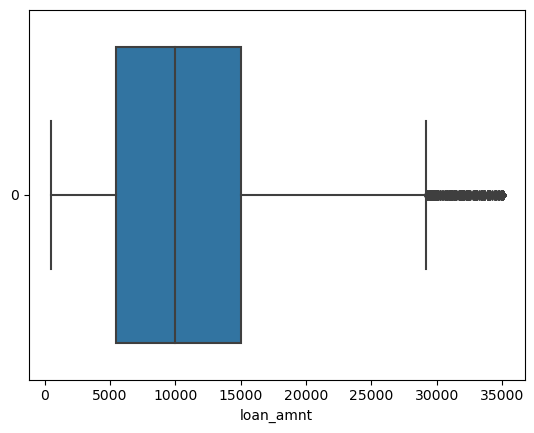

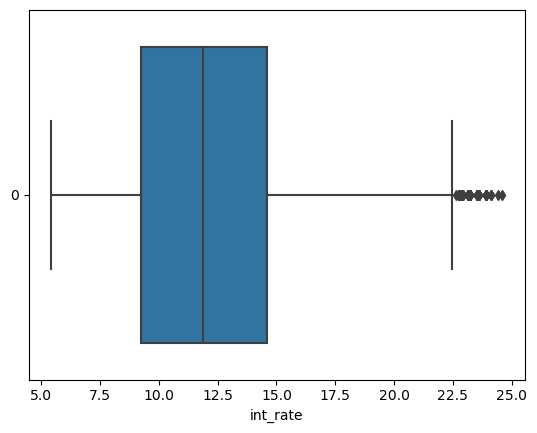

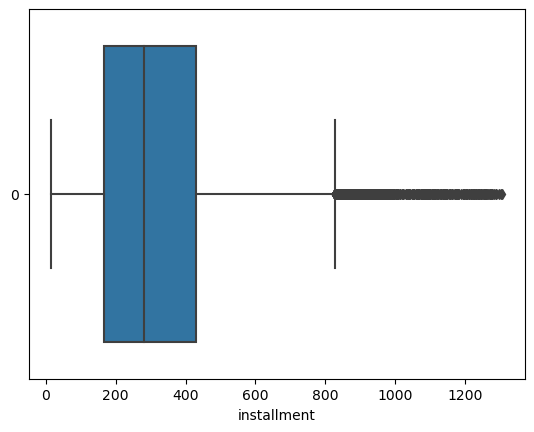

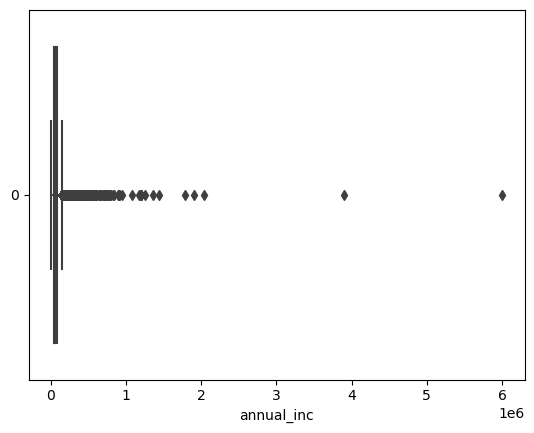

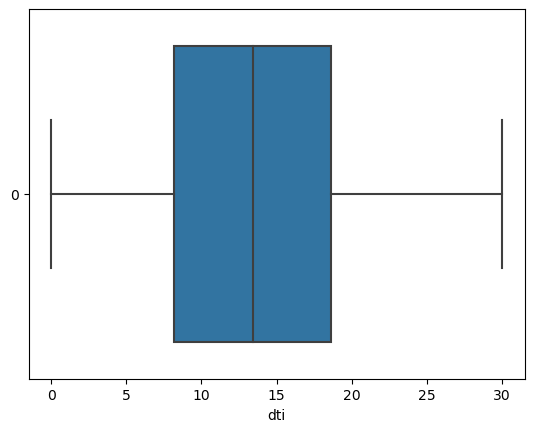

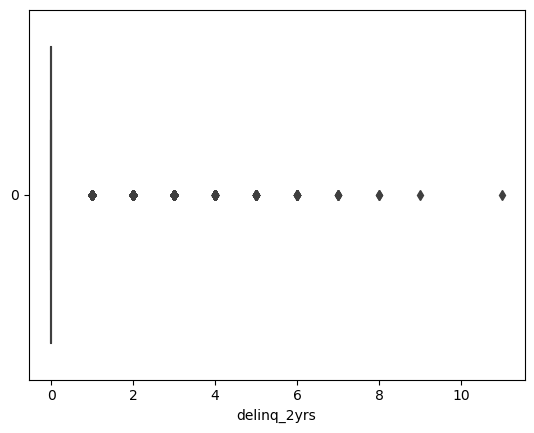

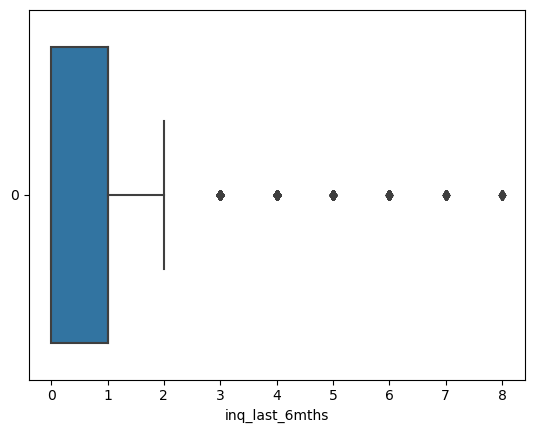

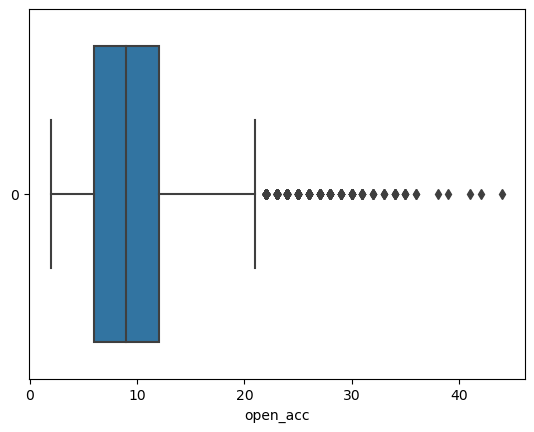

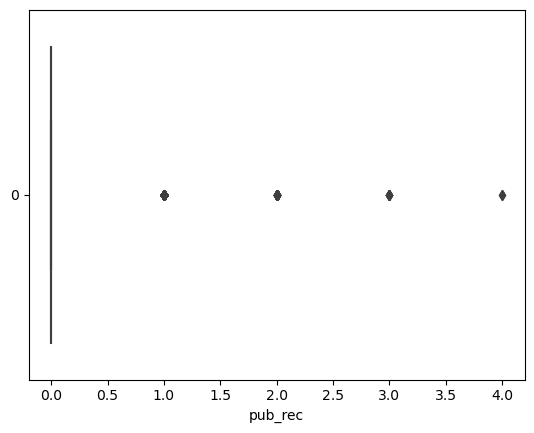

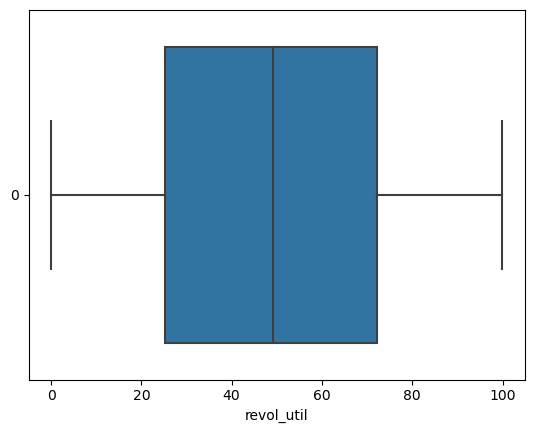

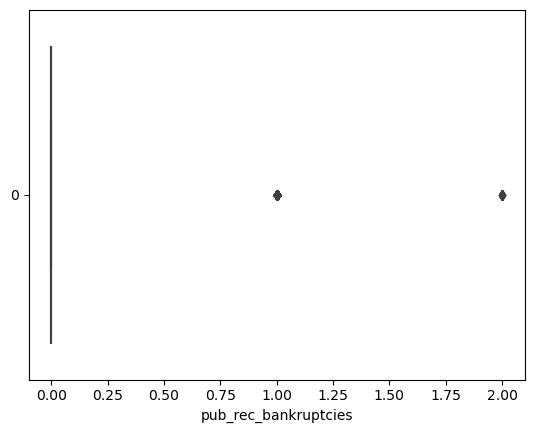

In [56]:
# Plotting box plots for all the numerical columns 

for col in num_col:
    sns.boxplot(df1[col],orient='h')
    plt.xlabel(col)
    plt.show()

Observations
-  Annual income has outliers; we will take a threshold and delete the outliers.
-  Even though the remaining columns have distubution of values outside the plot, they are sort of continuous, hence we are not deleting those outliers.

In [57]:
df1.annual_inc.describe(percentiles=[0.95,0.99])

count      39,717.00
mean       68,968.93
std        63,793.77
min         4,000.00
50%        59,000.00
95%       142,000.00
99%       234,999.36
max     6,000,000.00
Name: annual_inc, dtype: float64

In [58]:
# Considering the 99th percentile as a threshold, we are dropping the rows above the threshold value

df1 = df1[df1.annual_inc <= df1.annual_inc.quantile(0.99)]

In [59]:
print('The shape of final dataframe is',df1.shape)

The shape of final dataframe is (39319, 22)


## 3. Data Analysis

In [60]:
# As we need to find out driving factor for default, the individuals who are currently paying installments are of no use.
# Hence dropping those rows from the datafram

df1 = df1[df1.loan_status != 'Current']

In [61]:
df1.shape

(38193, 22)

In [62]:
# we are dividing the dataframe into two separate dataframes based on loan status

fully_paid = df1[df1.loan_status == 'Fully Paid']
charged_off = df1[df1.loan_status == 'Charged Off']

## 3.1 Univariate Analysis

### 3.1.1 Univariate Analysis - Numerical

In [63]:
# User defined function to plot graphs

def uni_num(col, t_1, t_2):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.histplot(data=fully_paid, x=col)
    plt.title(t_1)
    
    
    plt.subplot(1,2,2)
    sns.histplot(data=charged_off, x=col)
    plt.title(t_2)
    
    return plt.show()

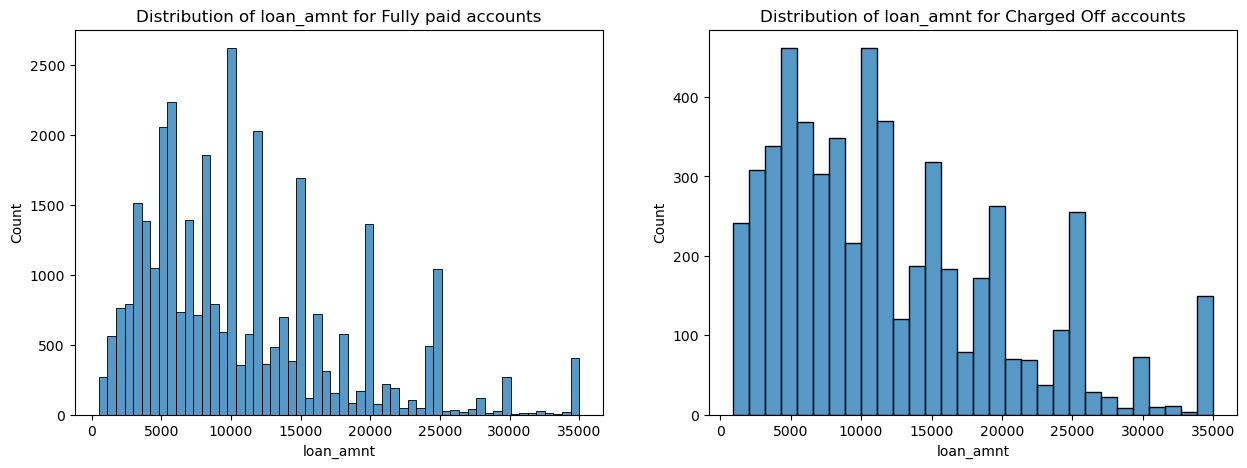

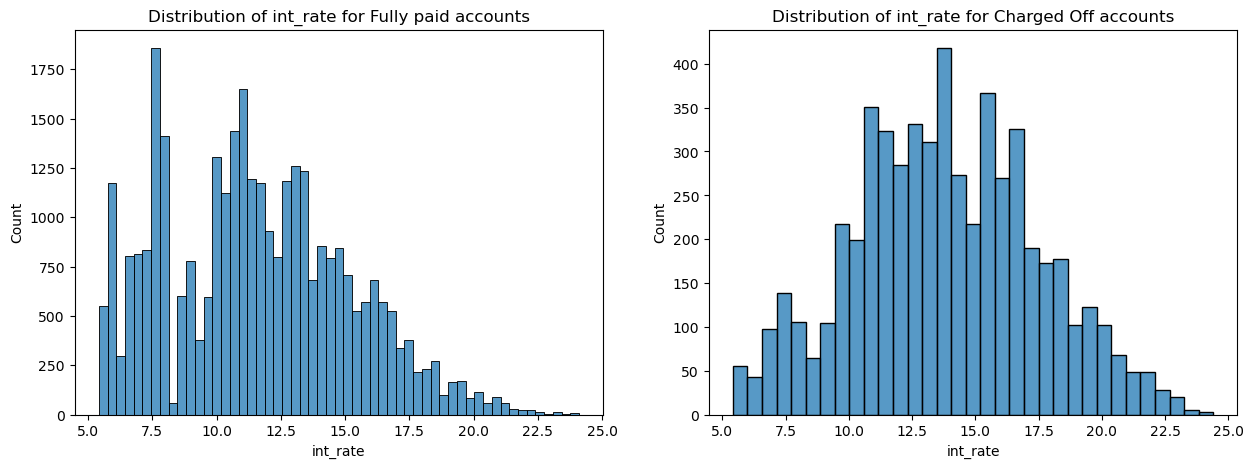

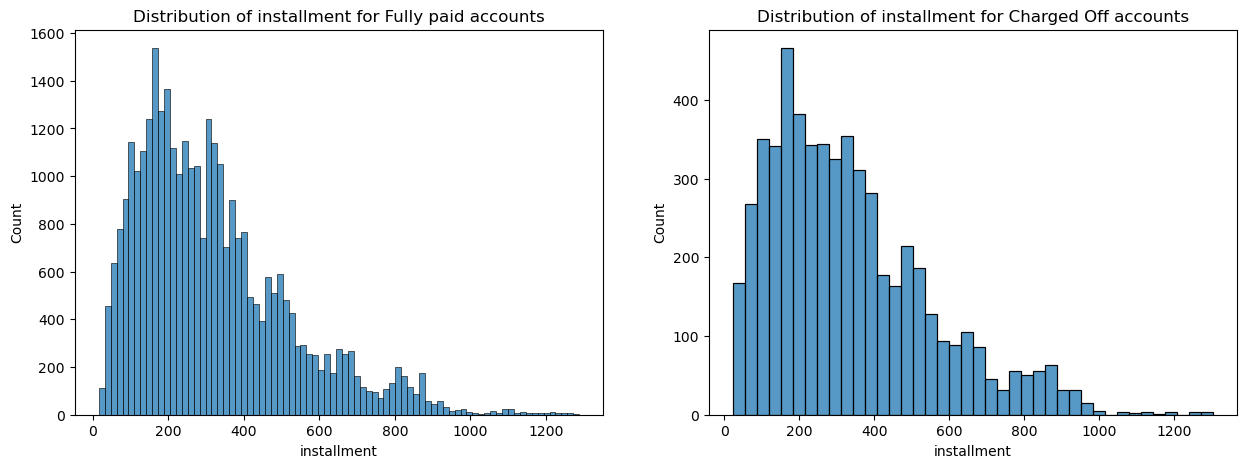

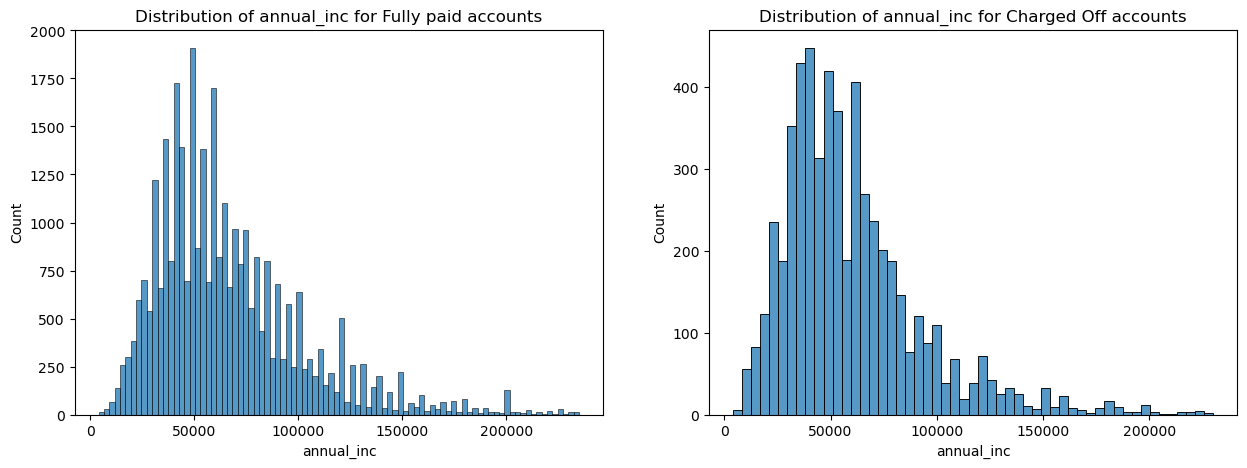

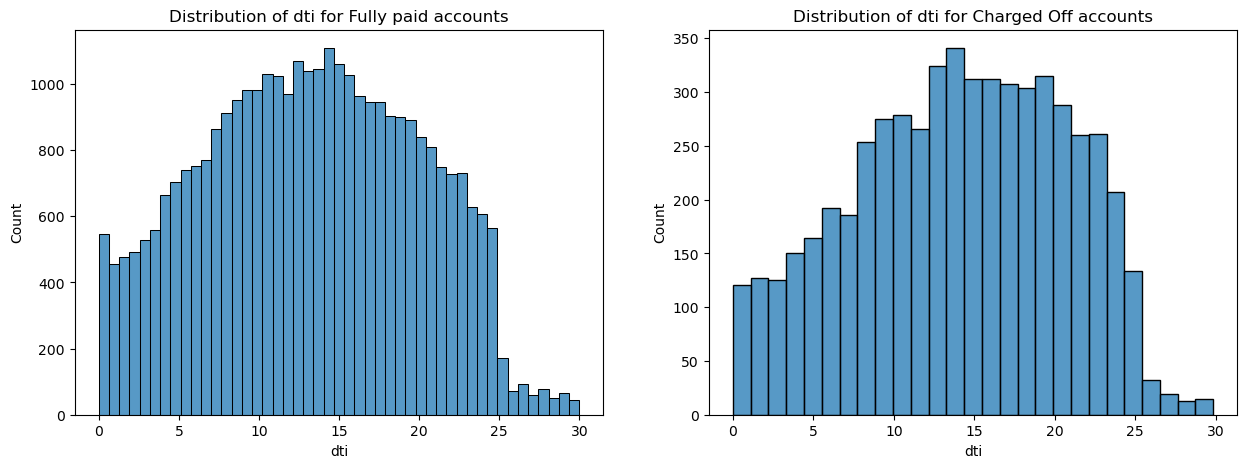

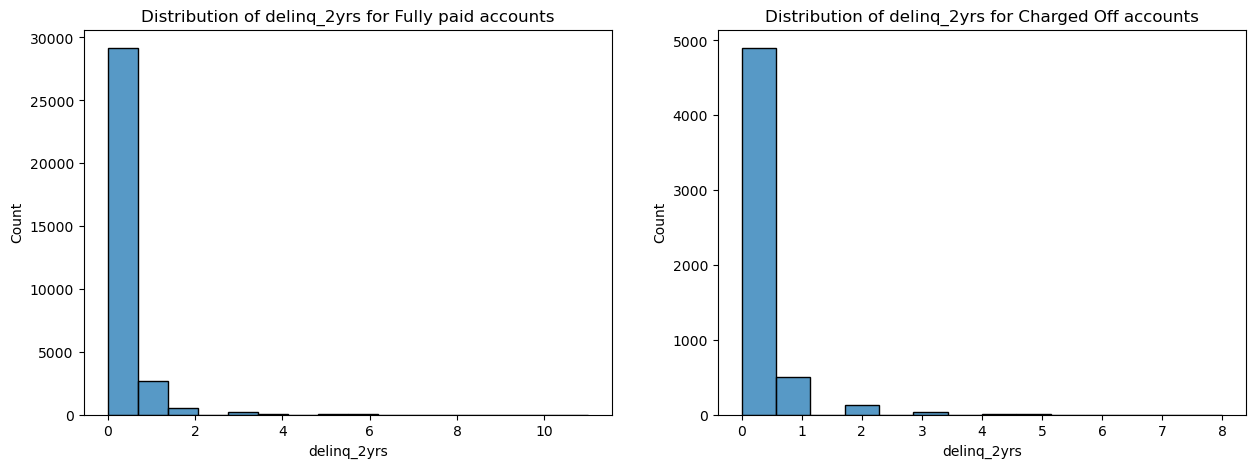

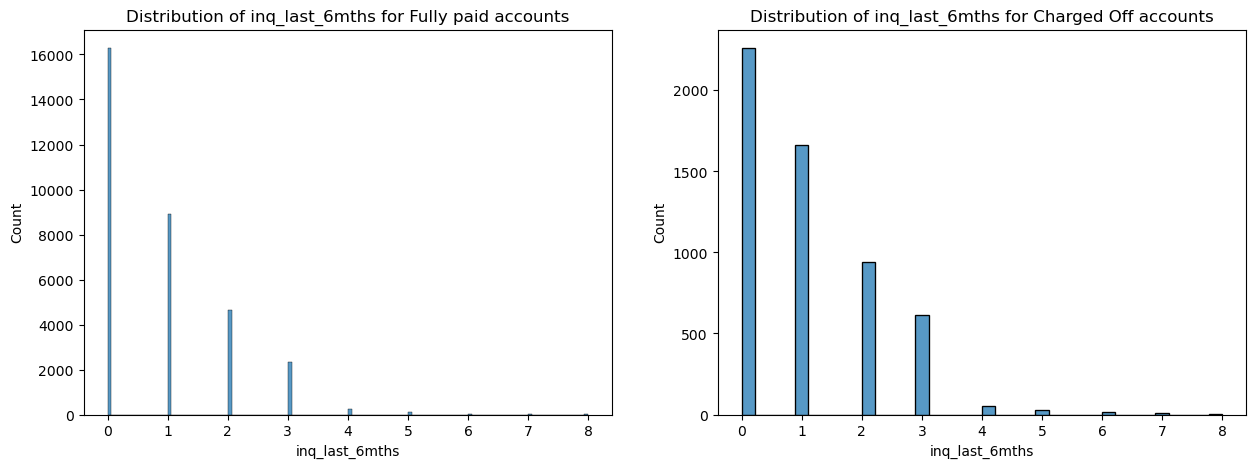

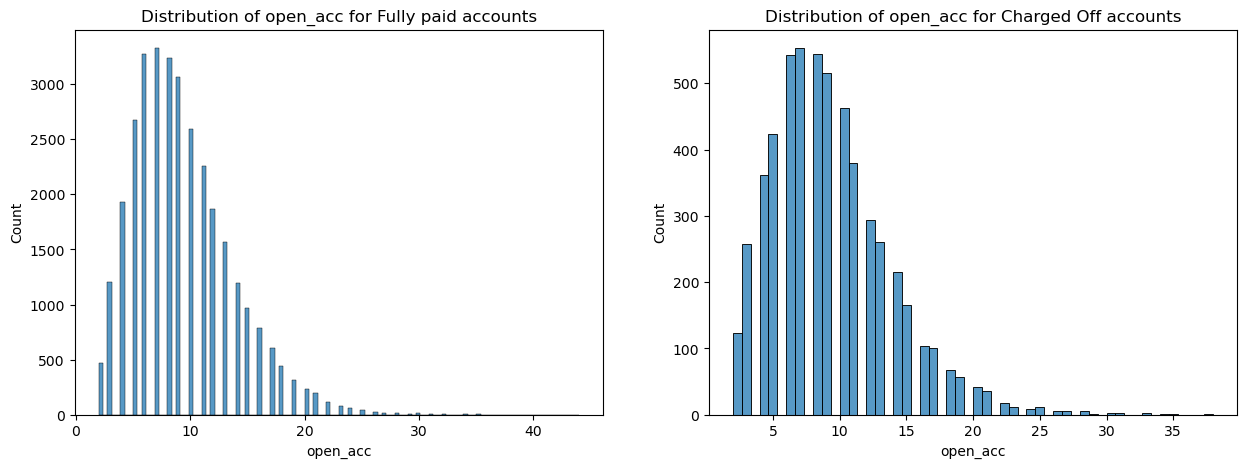

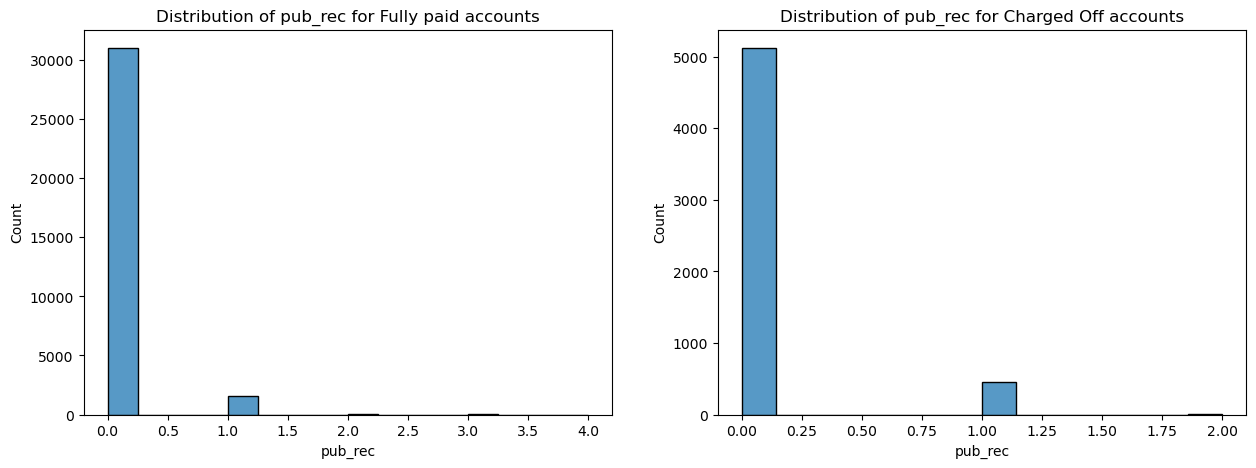

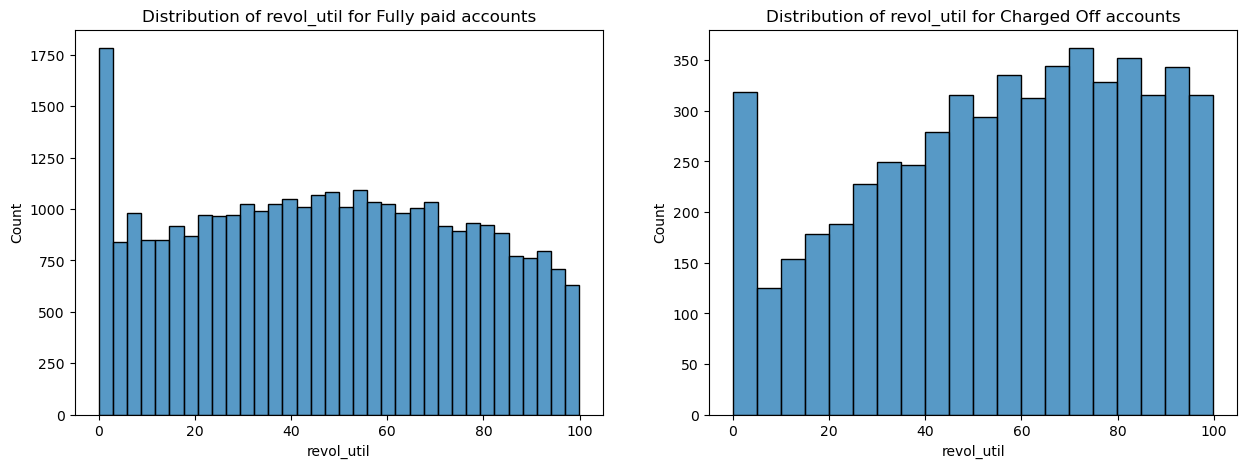

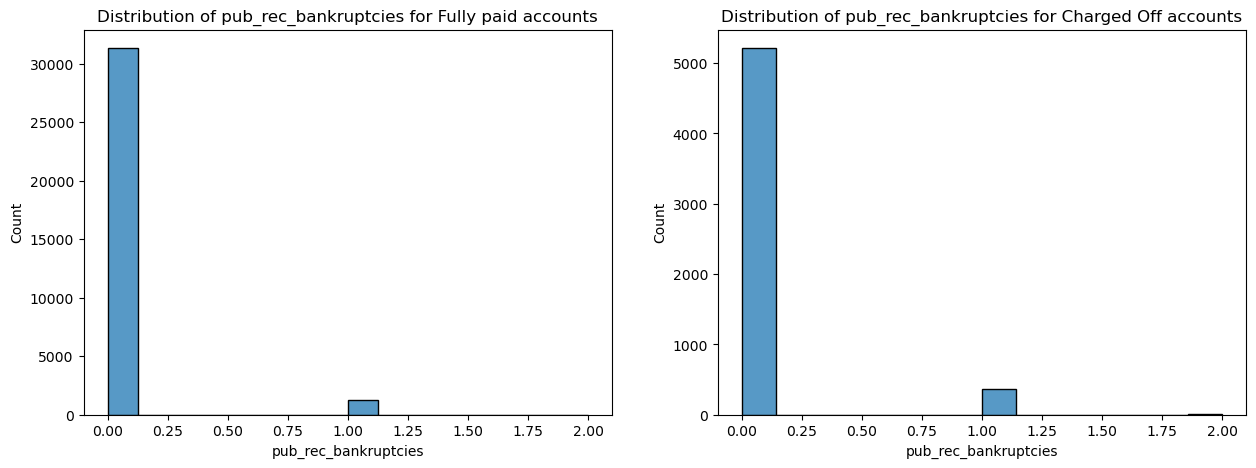

In [64]:
for col in num_col:
    title_1 = 'Distribution of '+col+' for Fully paid accounts'
    title_2 = 'Distribution of '+col+' for Charged Off accounts'
    uni_num(col, title_1,title_2)

Observations
-  Borrowers with loan amounts in the range of 5,000 to 10,000 are more likely to default.
-  The interest rate distribution is more uniform for the borrowers who were defaulters, while the interest rate for borrowers who fully paid was more inclined to lower rates.
-  The majority of the defaulters have installments in the range of 100 to 400.
-  The majority of the defaulters have low income levels.

### 3.1.2 Univariate Analysis - Categorical Variables

In [65]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line']

In [66]:
# User defined function to plot countplots of categorical variables

def uni_cat(col, t_1, t_2):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.countplot(data=fully_paid, x=col)
    plt.title(t_1, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
    if col in ['sub_grade','emp_length','purpose','addr_state']:
        plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    sns.countplot(data=charged_off, x=col)
    plt.title(t_2, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
    if col in ['sub_grade','emp_length','purpose','addr_state']:
        plt.xticks(rotation = 90)
       
       
    return plt.show()

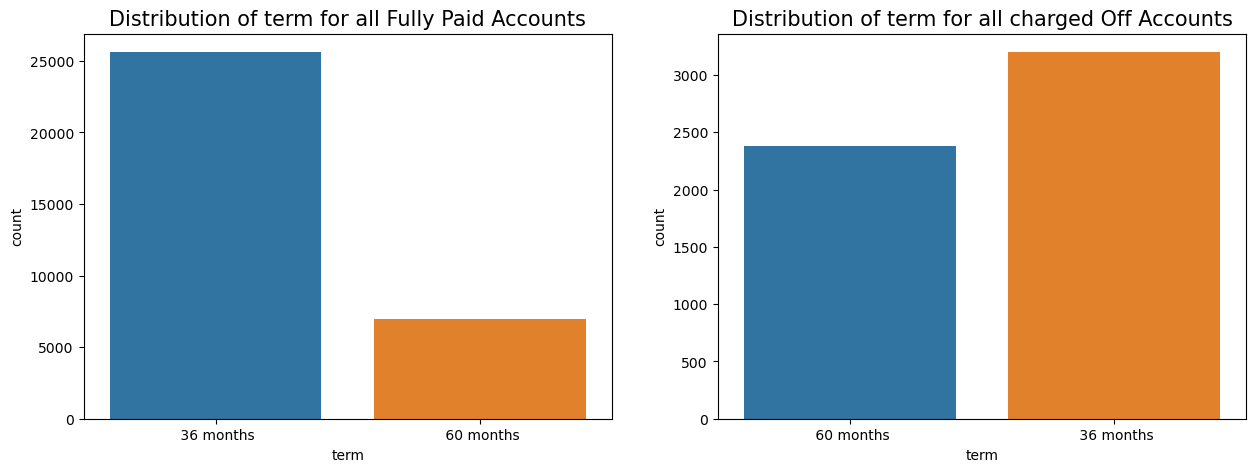

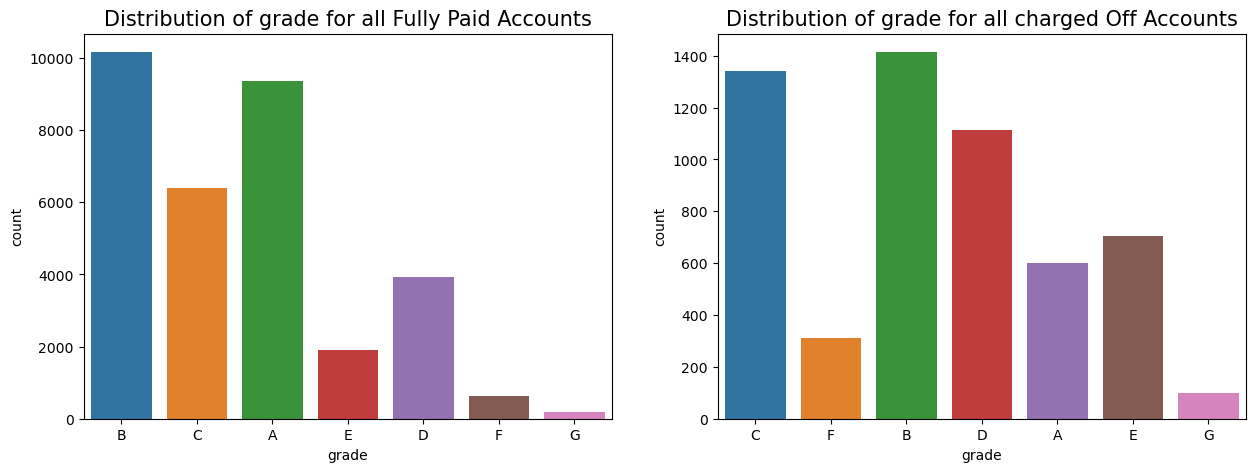

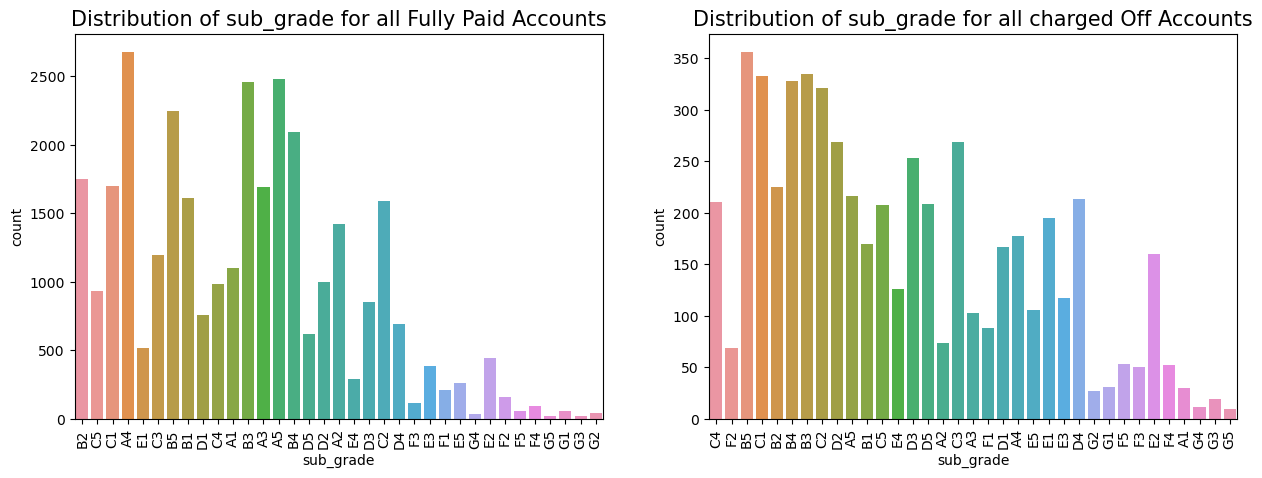

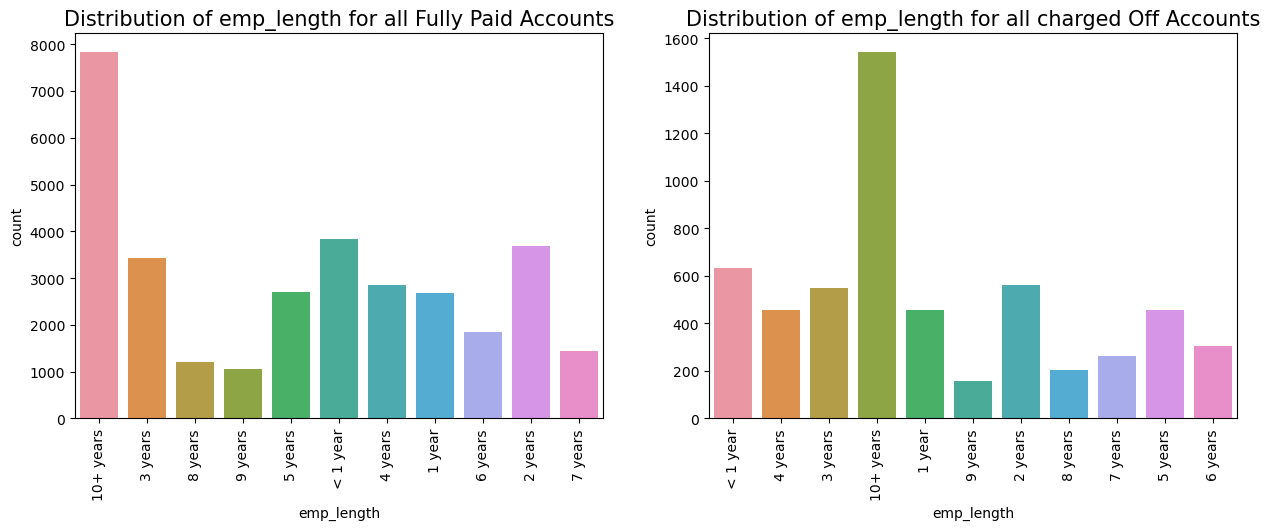

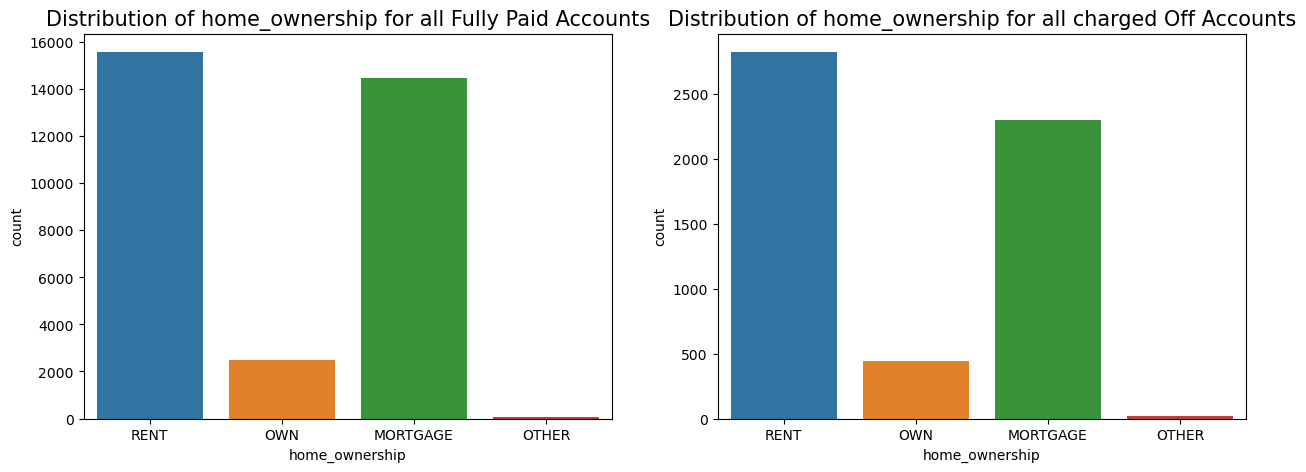

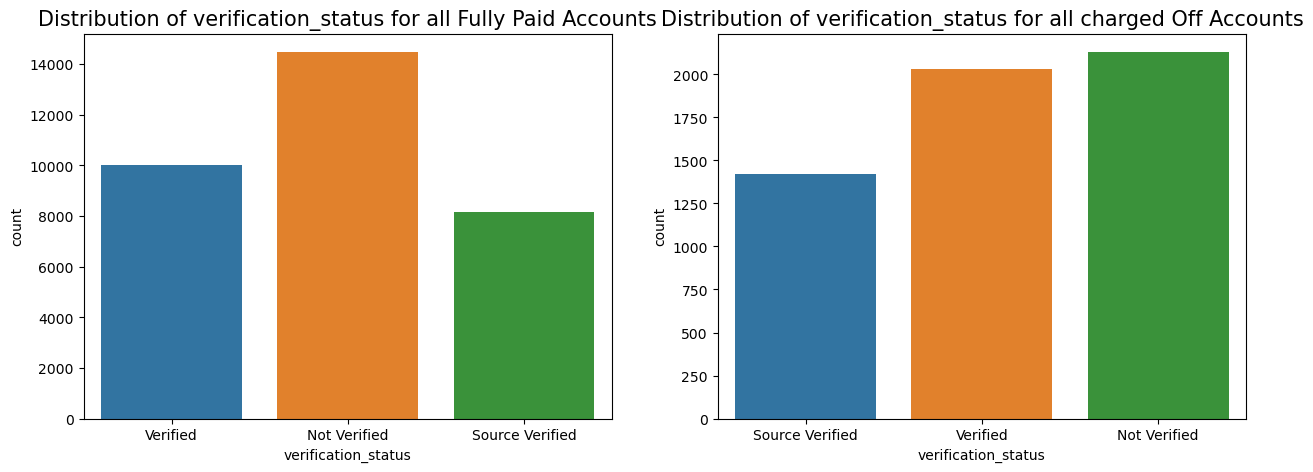

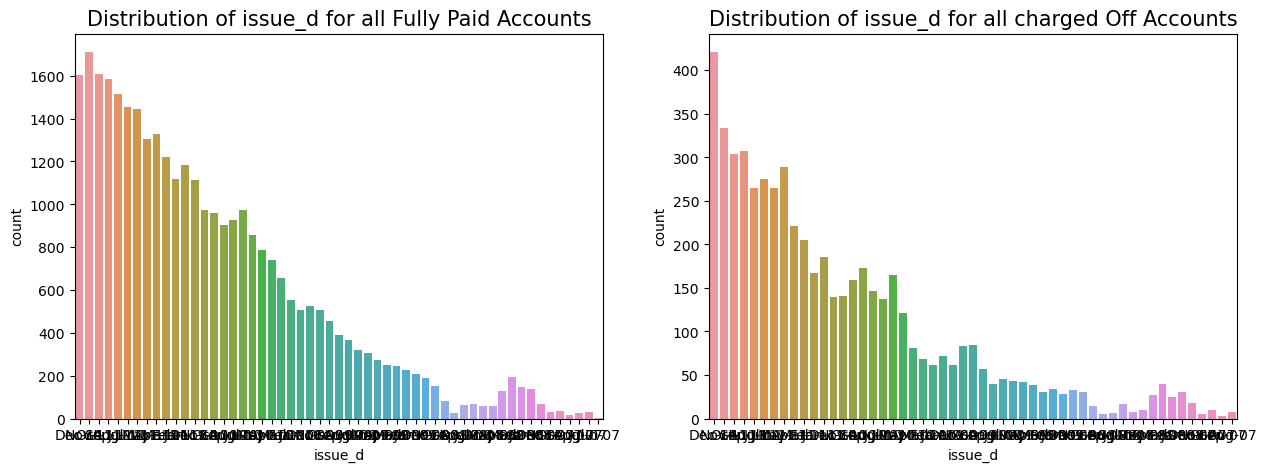

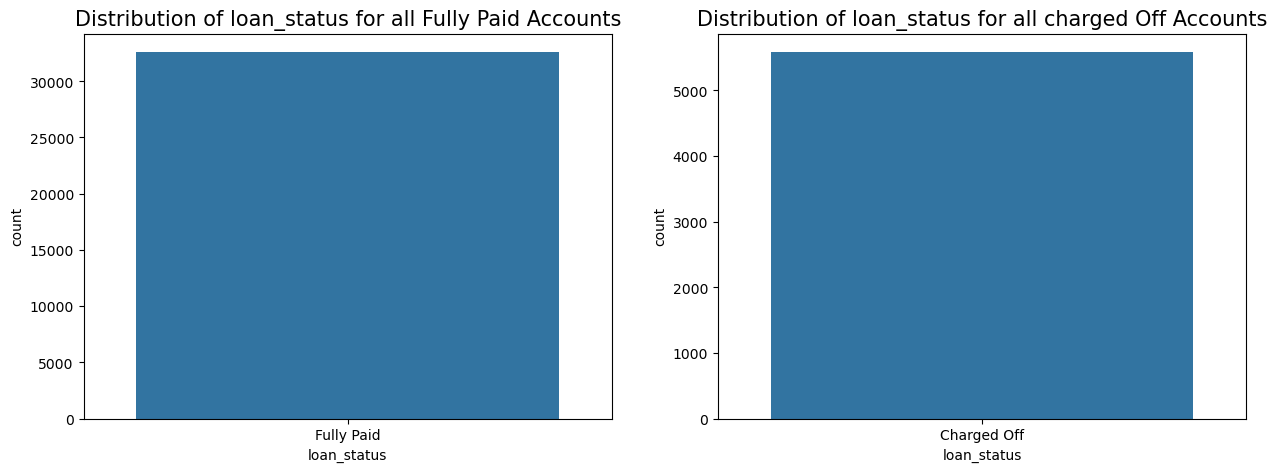

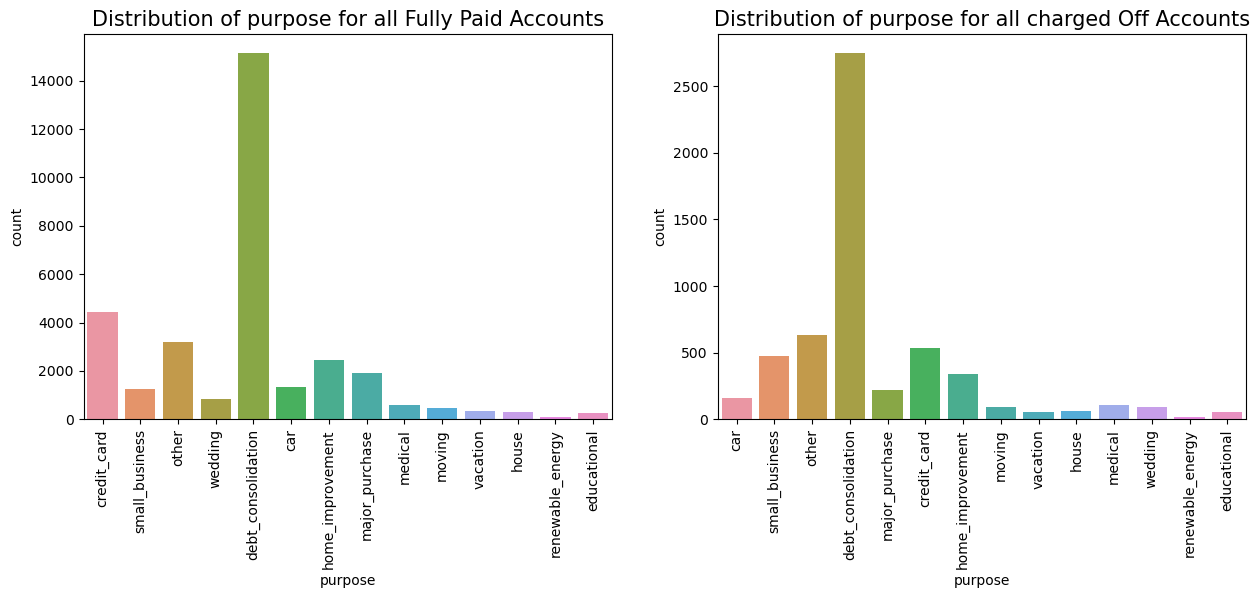

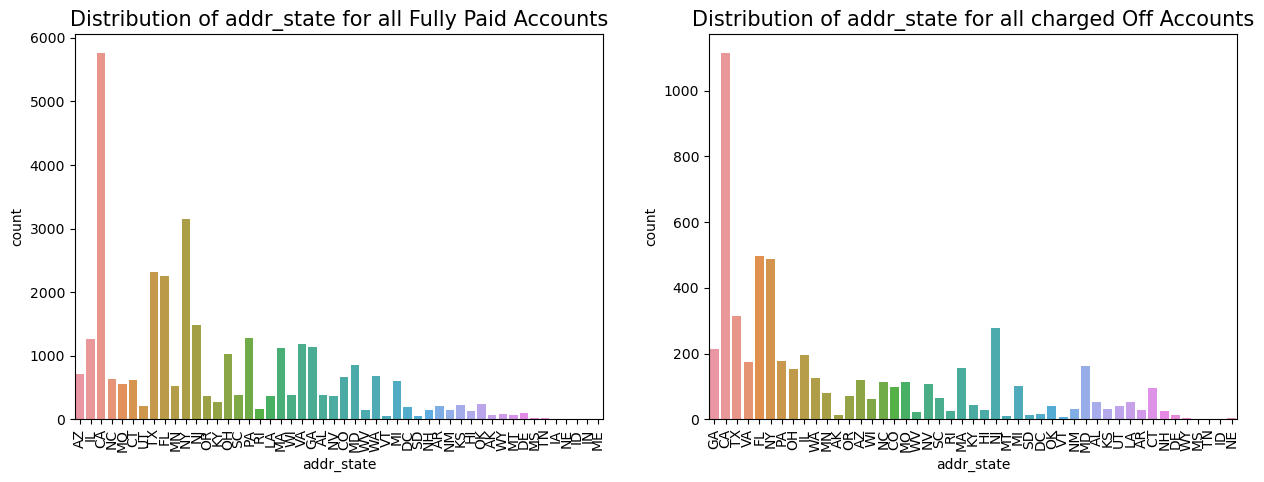

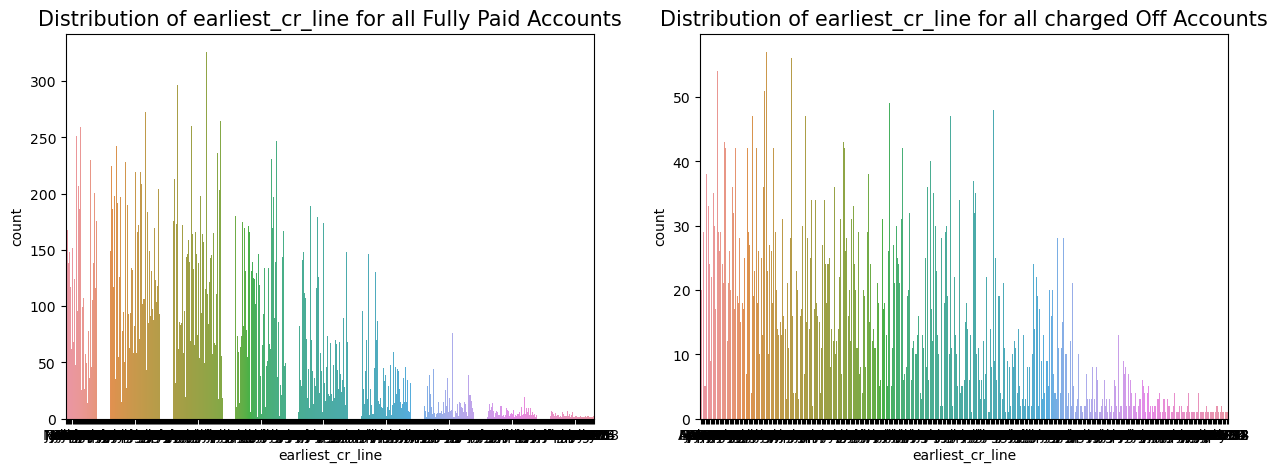

In [67]:
for cat in cat_col:
    title_1 = 'Distribution of ' + cat + ' for all Fully Paid Accounts'
    title_2 = 'Distribution of ' + cat + ' for all charged Off Accounts'
    uni_cat(cat,title_1, title_2)

Observations
-  Most of the borrowers chose 36 months as their tenure; however, the difference between the borrowers with 36 and 60 months is much greater in the fully paid group than the defaulters group. i.e., borrowers who choose 36 months as tenure are less likely to default on their loan
-  Borrowers from Grade B are more defaulters, followed by Grade C.
-  Most of the defaulters are from the B5 subgrade.
-  The most experienced are the ones who are likely to default on Laon.
-  The borrowers who are renting a house are likely to default on
-  Most of the borrower's income was not verified, and the not verified category has the highest number of defaulters, followed by verified. 
-  Borrowers who took out a loan for debt consolidation are likely to default on the loan.
-  Borrowers from California, Florida, and New York are likely to default on their loans.

### 3.1.3 Segmented Univarite Analysis

In [68]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line']

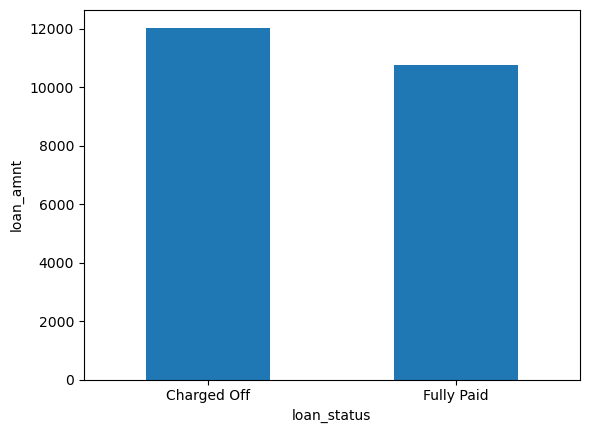

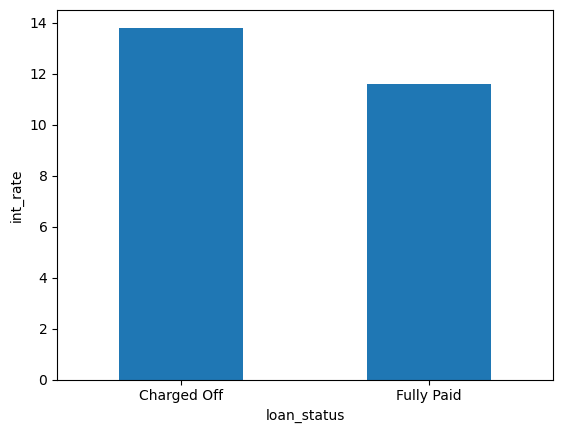

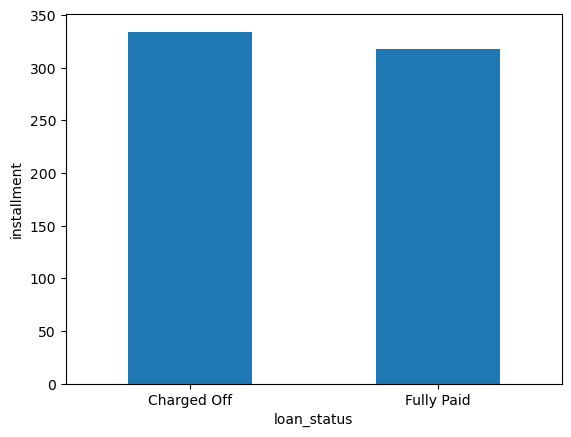

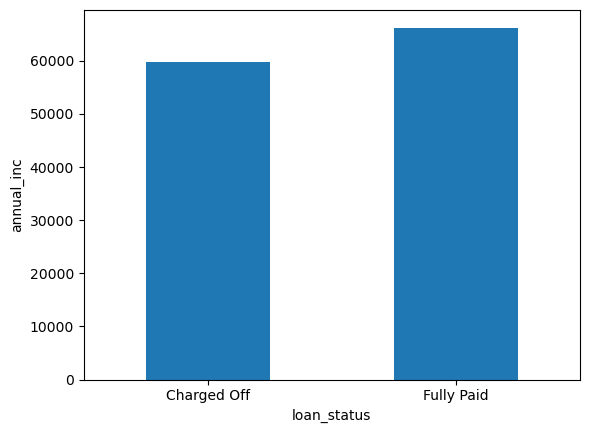

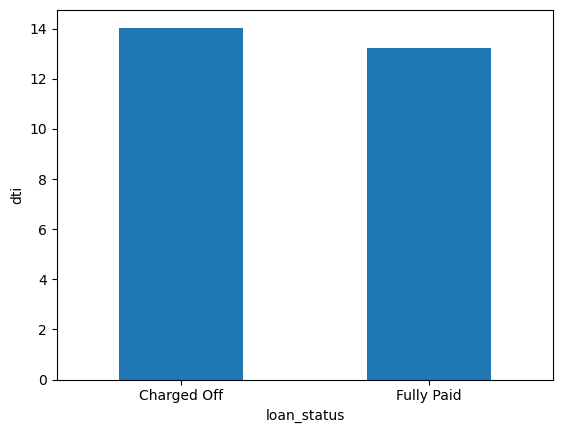

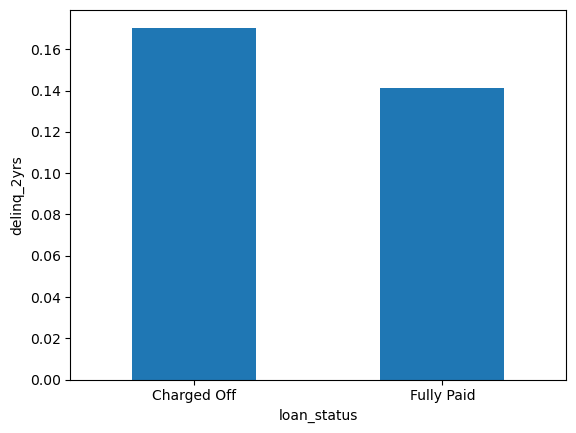

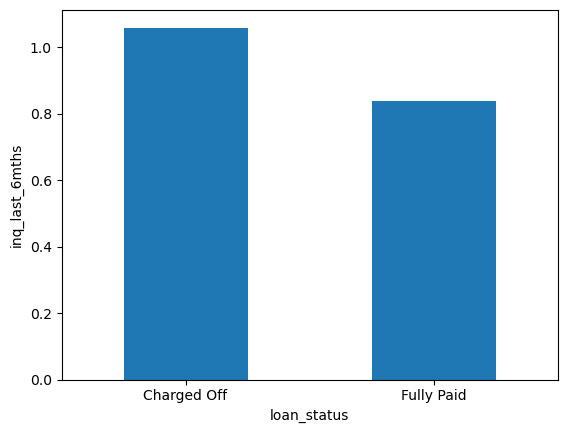

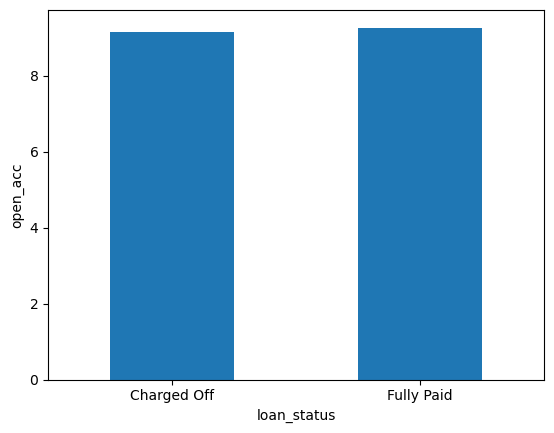

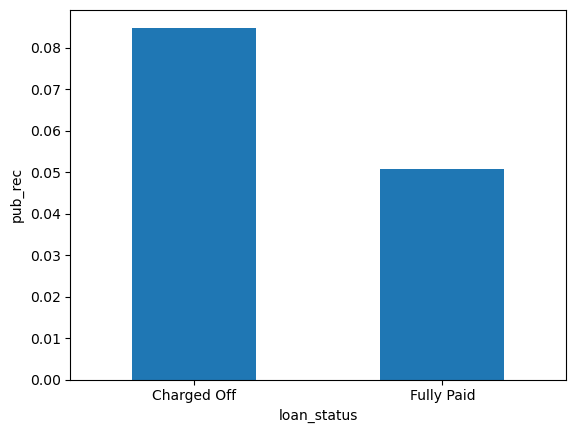

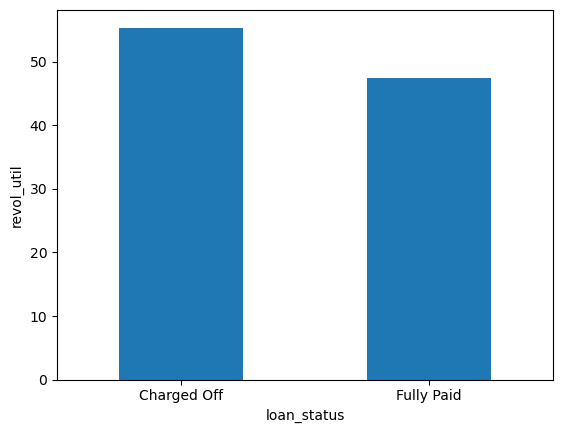

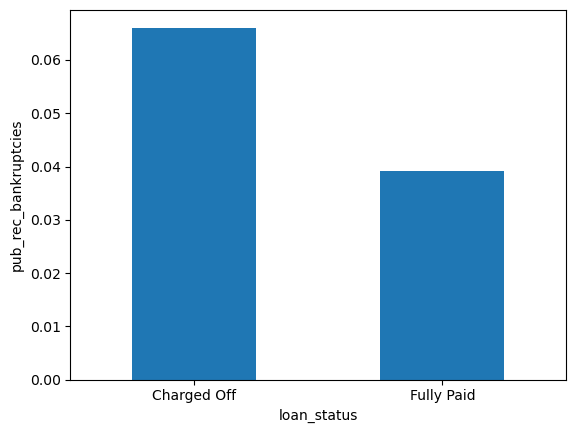

In [69]:
# We are considering only loan_status variable here, because that is the target variable

for col in num_col:
    df1.groupby('loan_status')[col].mean().plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel(col)
    plt.show()

Observations:
Loans are likely to default when
-  Borrowers take on a higher loan amount.
-  There is a loan with a higher interest rate and installments.
-  Borrowers with a low annual income
-  high DTI ratio, delinquency rate, and more inquiries in the last 6 months
-  higher revolving credit utilisation and a higher number of public records of bankruptcies

### 3.2 Bivariate Analysis

### 3.2.1 Numerical Vs Numerical

In [70]:
# User defined function to plot scatter plots

def biv_num_num(p,q):
    sns.scatterplot(data=charged_off, x=p, y=q)
    return plt.show()

In [71]:
# Finding the correlation between all the numerical columns

corr_val = df1[num_col].corr()

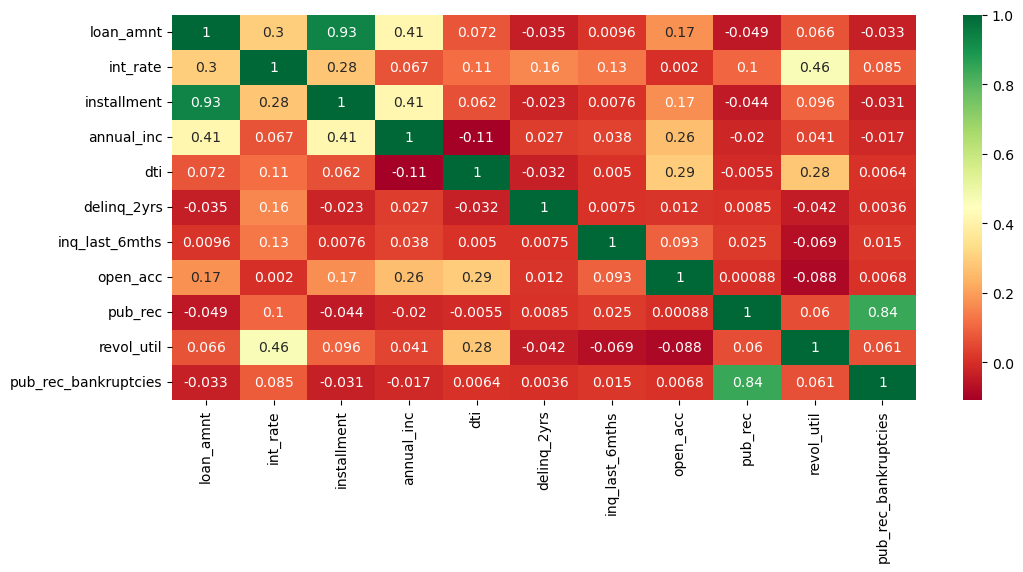

In [72]:
plt.figure(figsize=(12,5))
sns.heatmap(corr_val, annot=True, cmap='RdYlGn')
plt.show()

Observations:
-  Loan amount and installments are highly correlated
-  Derogatory public records and public record of bankruptcies are highly correlated
-  Except the above four columns there is not much of a linear relationshp between the remaining columns

### 3.2.2 Numerical Vs Categorical

In [73]:
# User defined function to plot box plots 

def biv_num_cat(p,q):
    sns.boxplot(data=charged_off, x=p, y=q)
    if p in ('emp_length','purpose'):
        plt.xticks(rotation=90)
    return plt.show()

In [74]:
# Considerng only a few of categorical columns for the analysis

cat_col1 = ['term','grade','emp_length','home_ownership','verification_status','purpose']

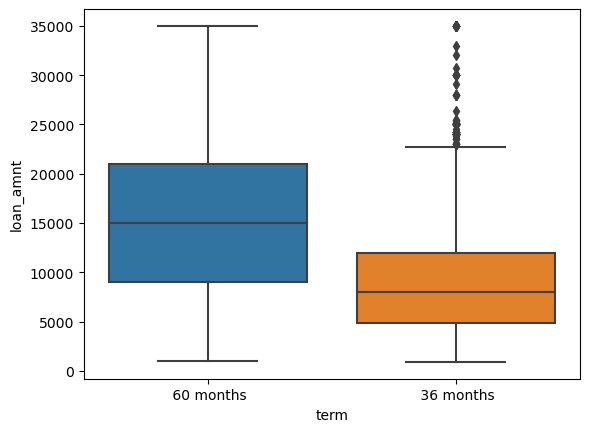

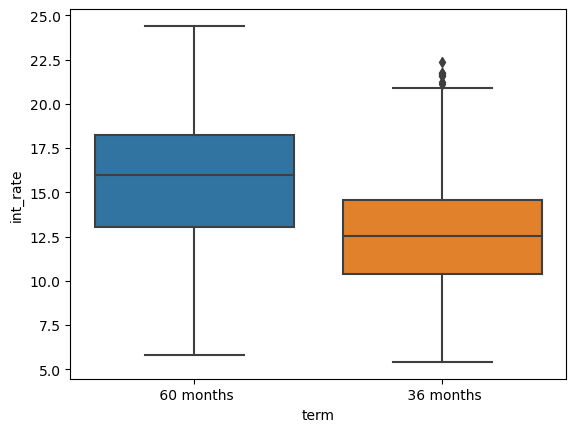

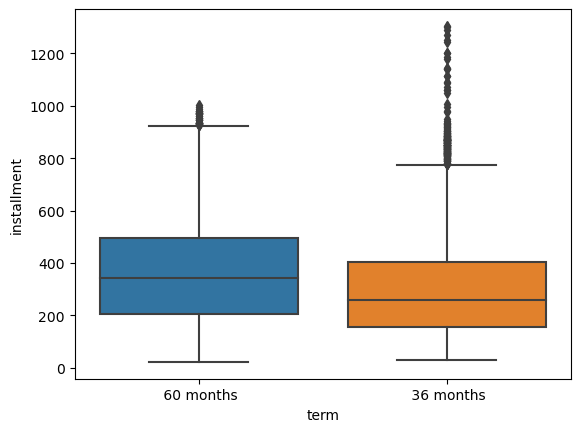

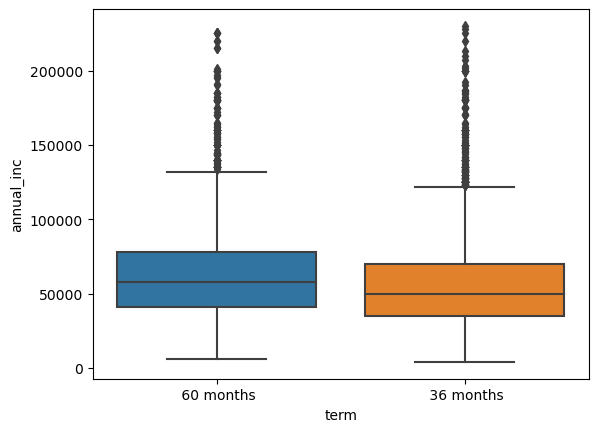

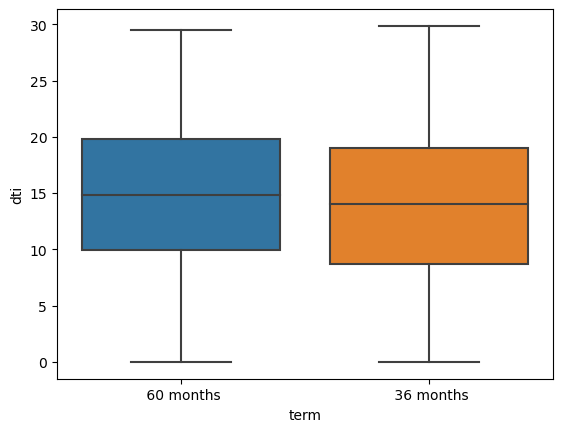

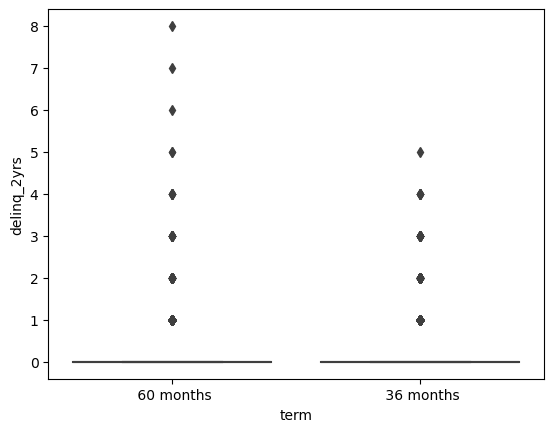

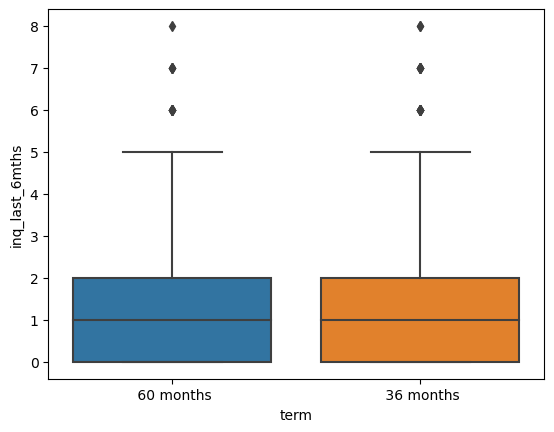

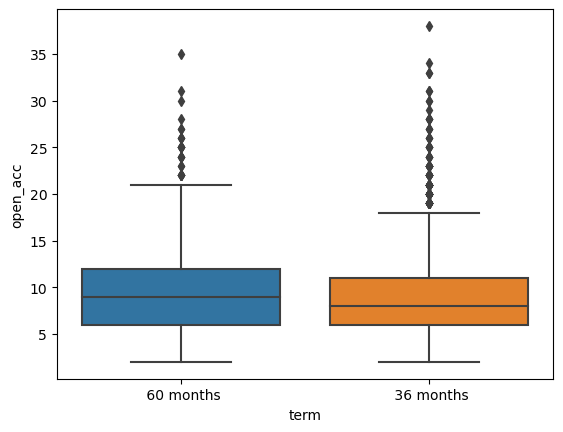

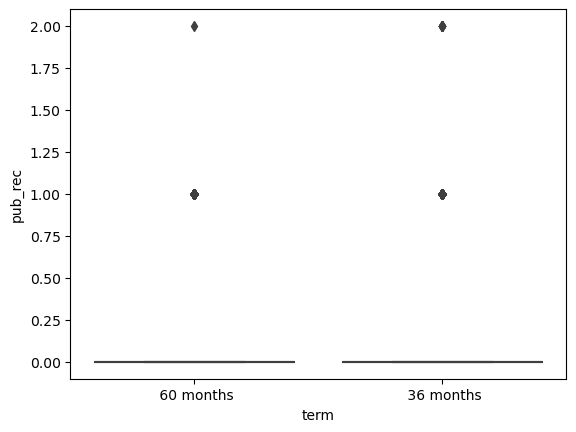

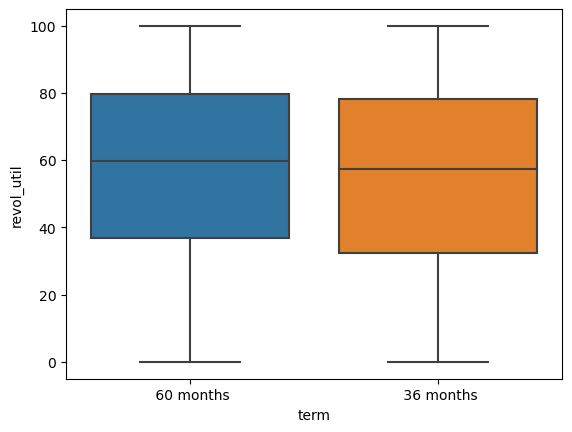

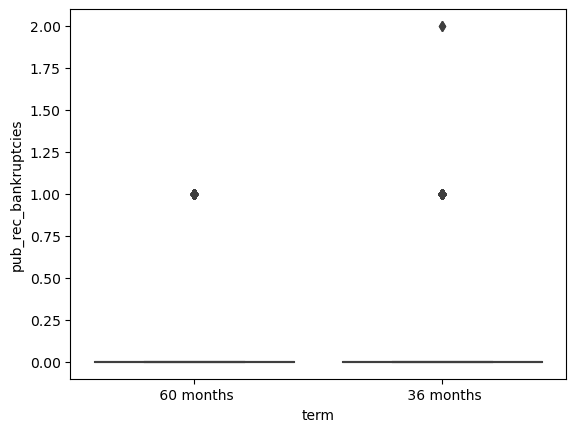

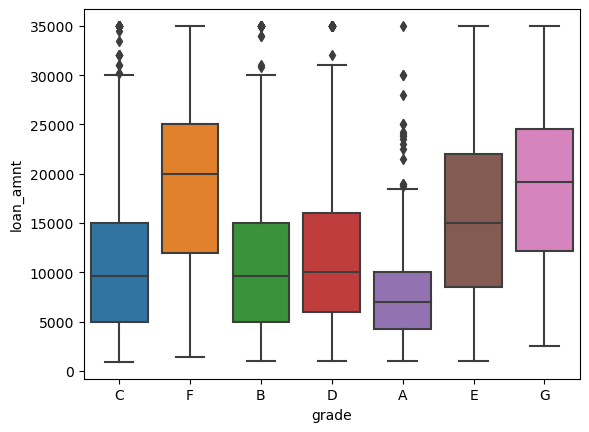

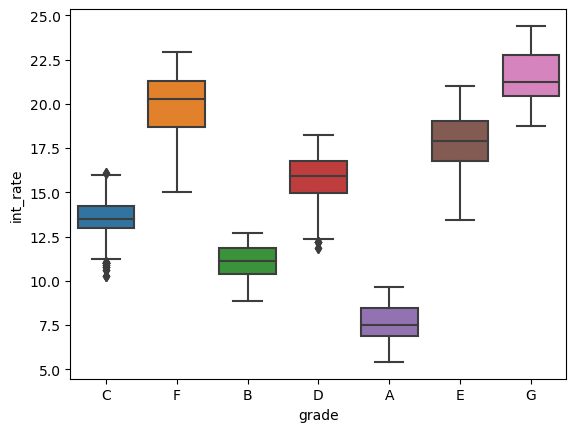

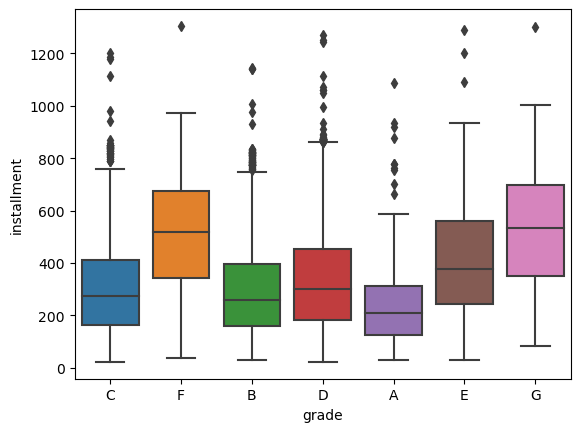

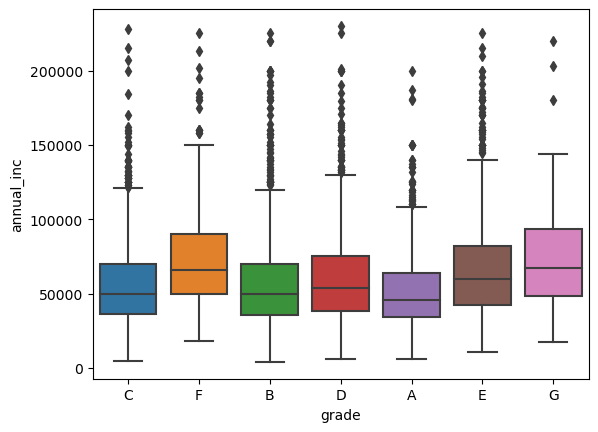

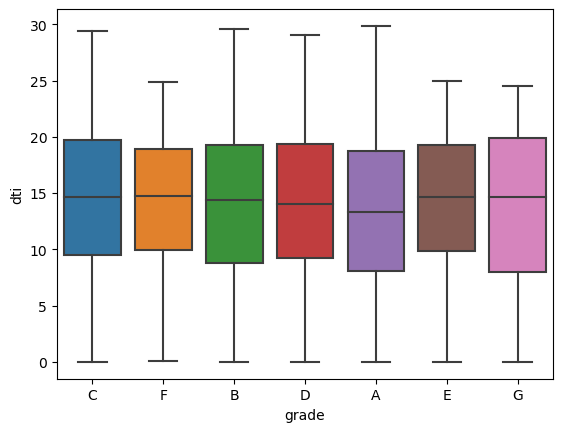

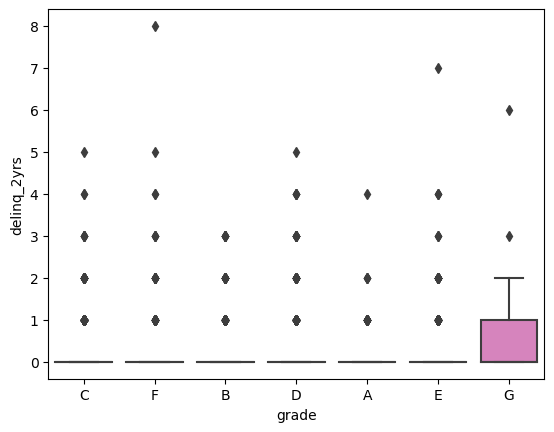

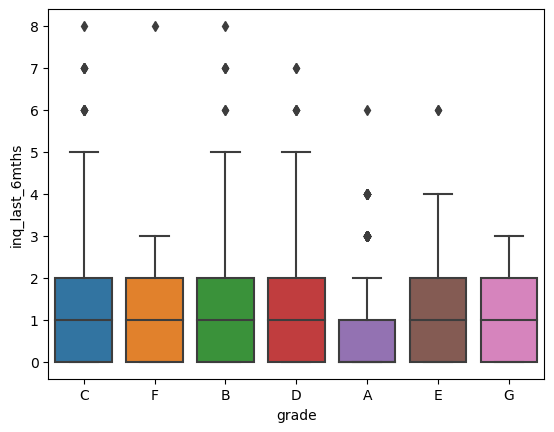

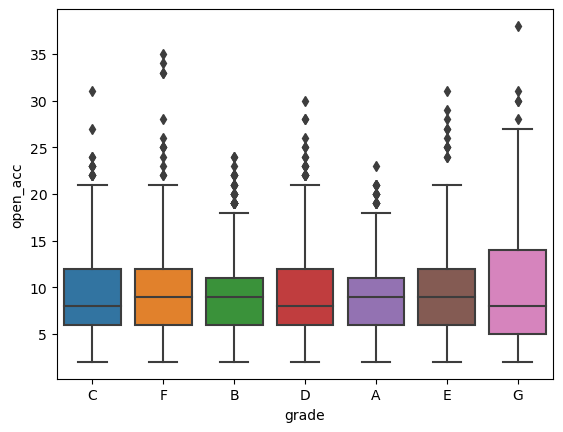

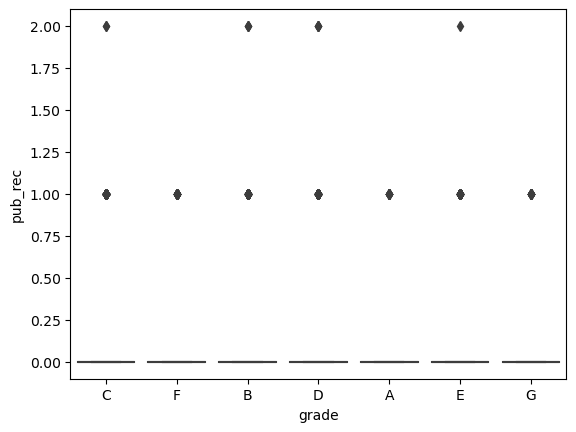

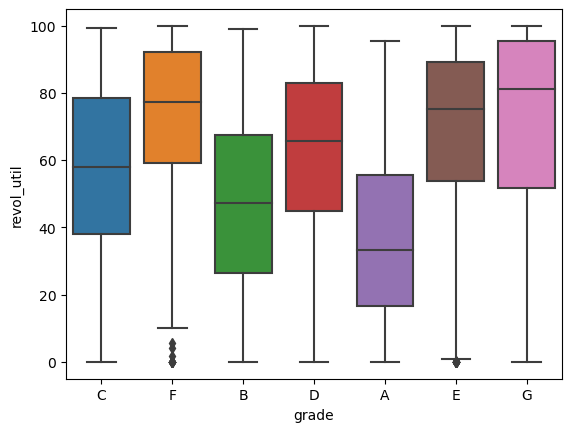

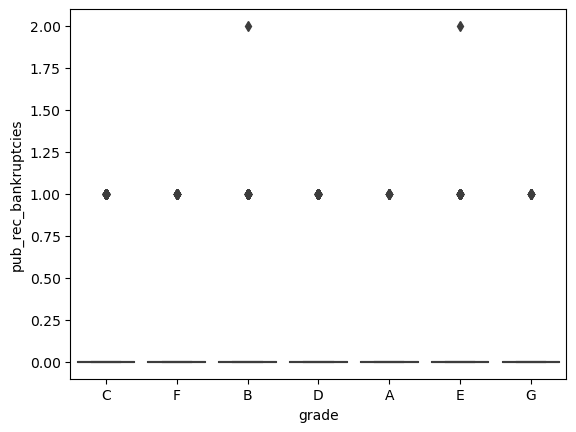

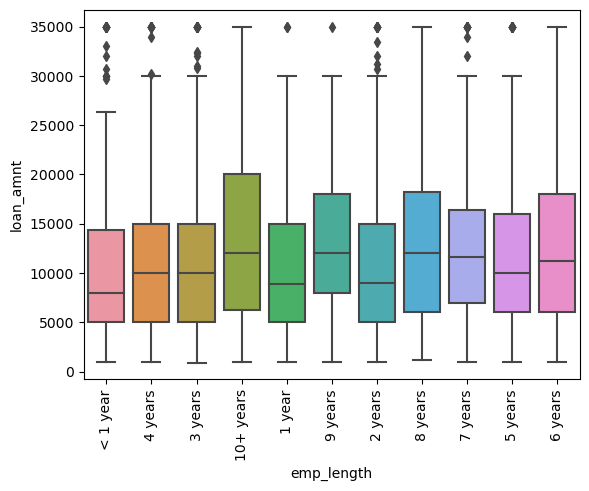

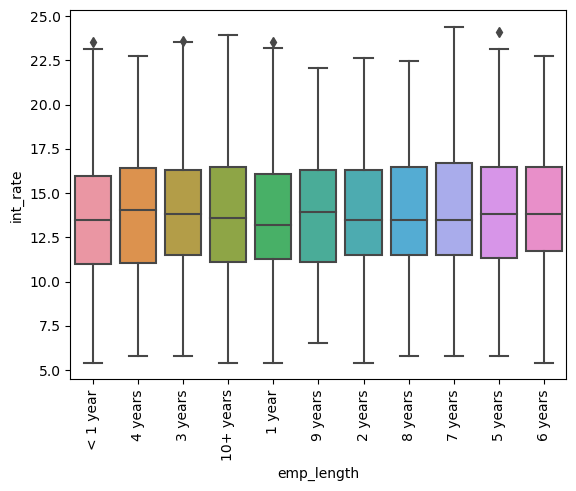

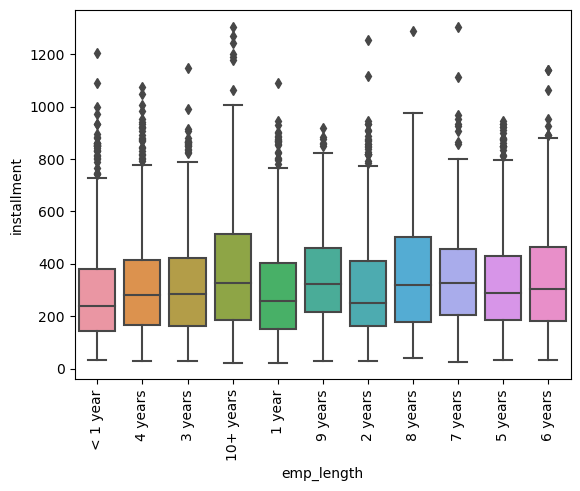

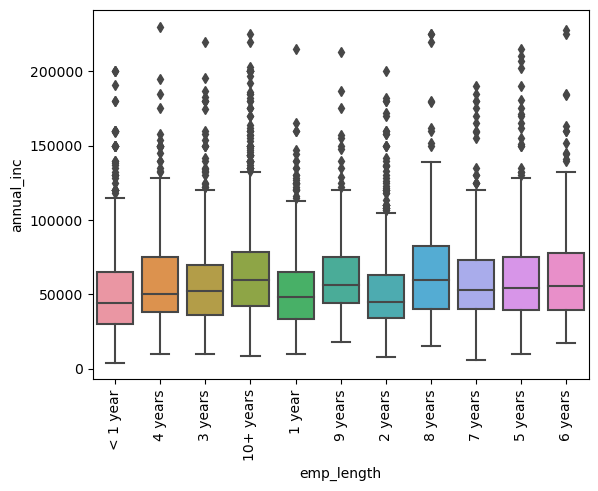

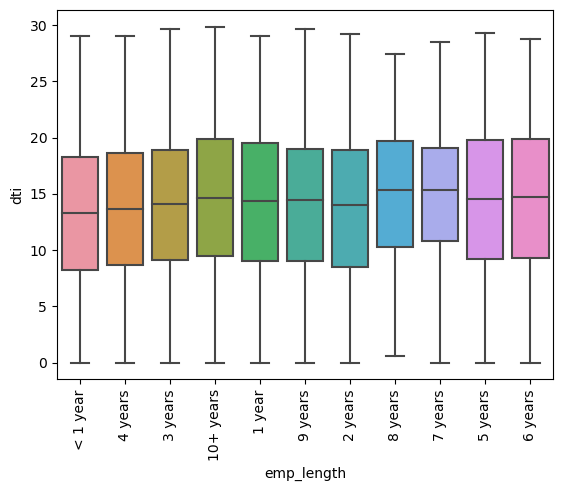

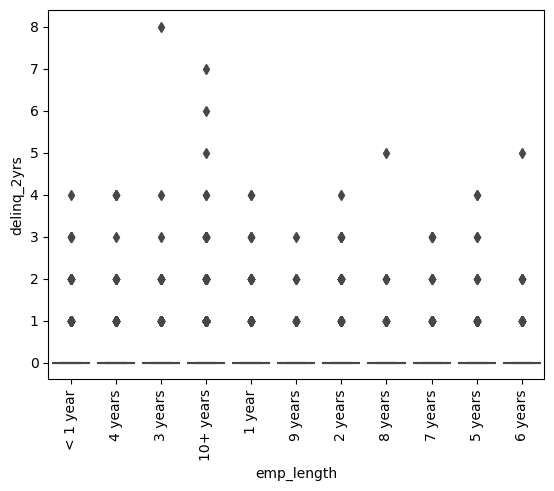

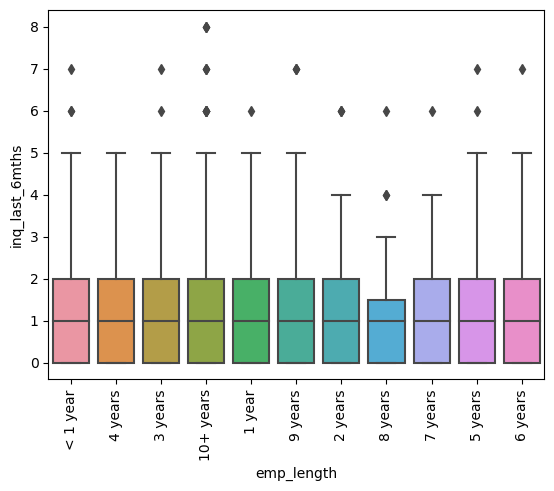

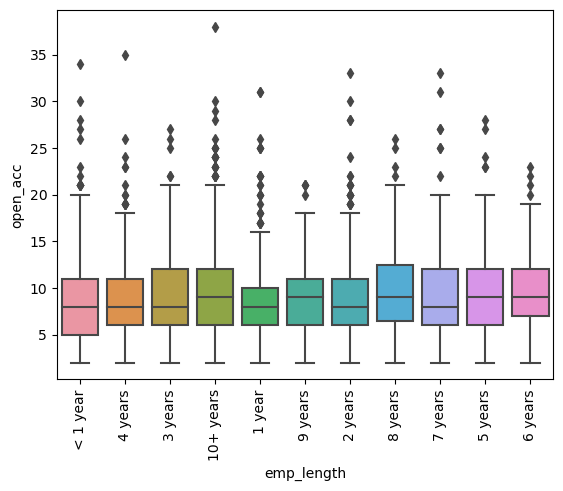

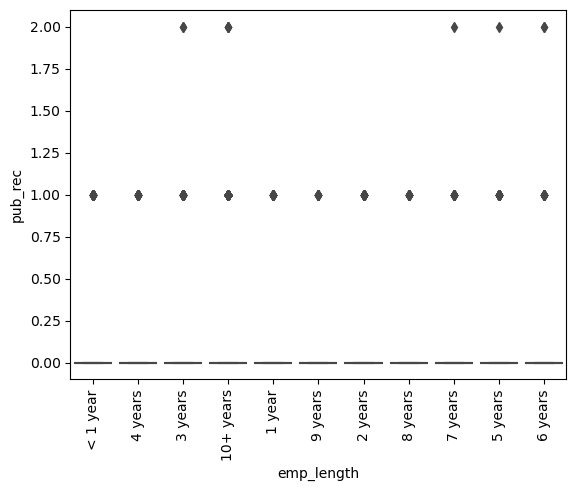

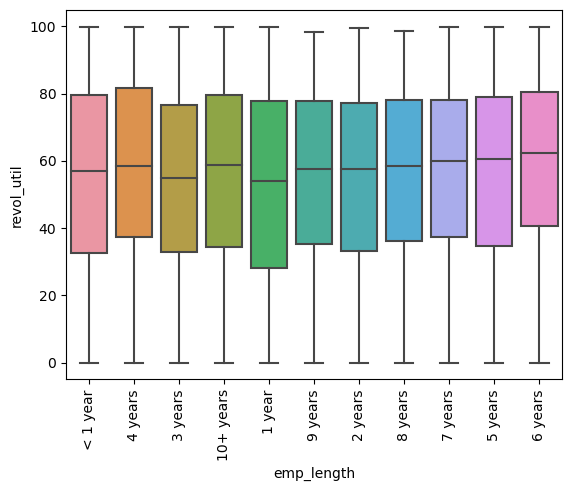

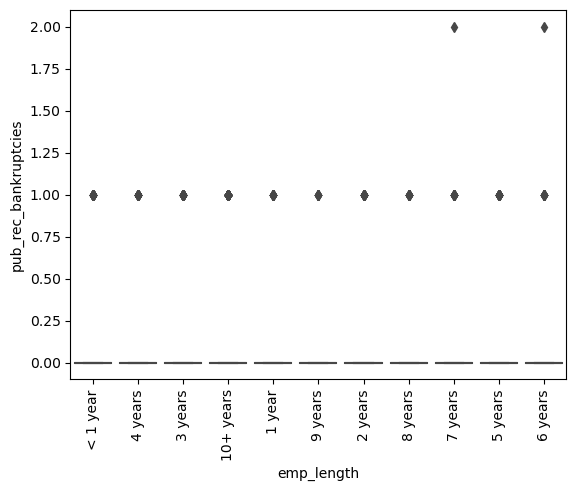

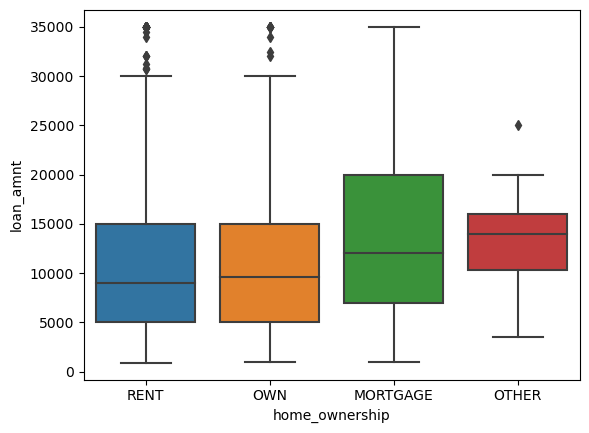

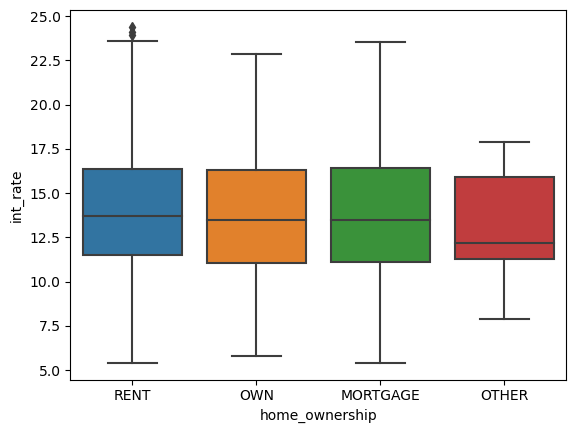

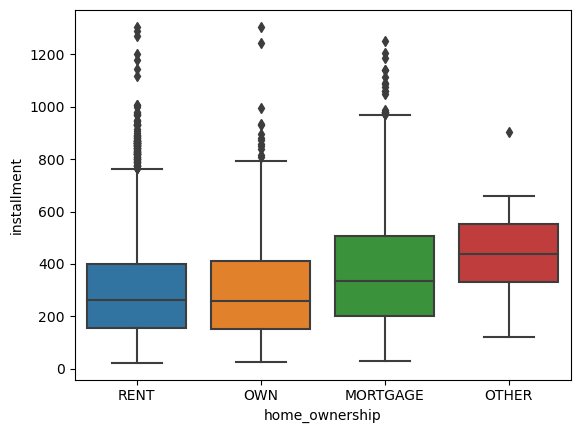

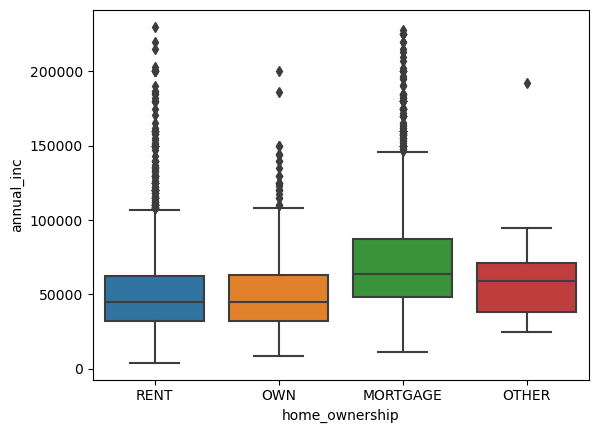

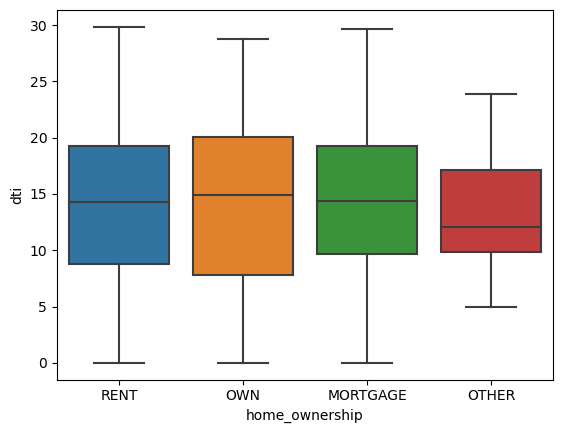

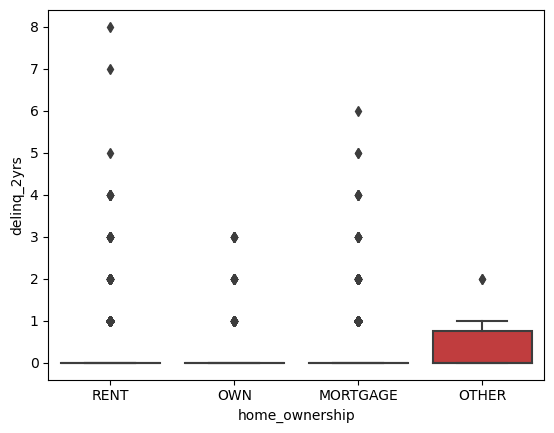

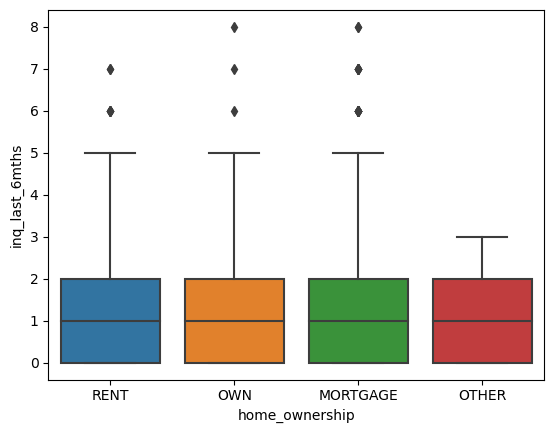

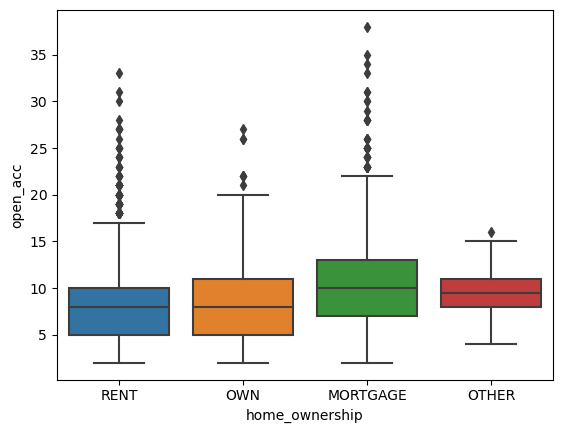

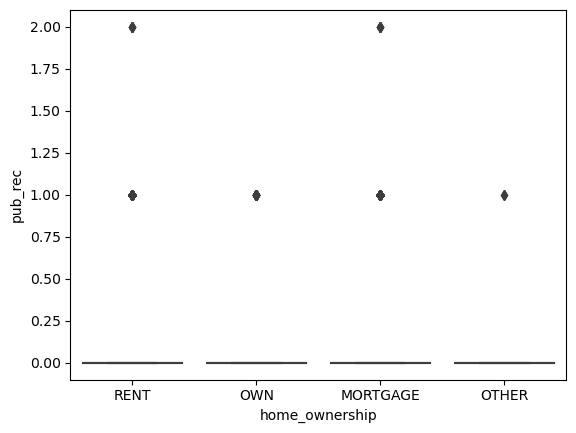

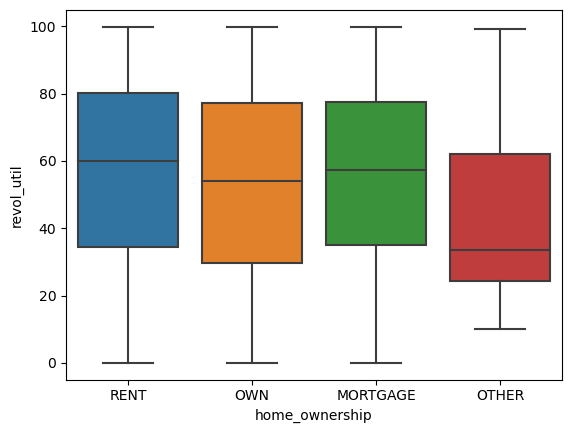

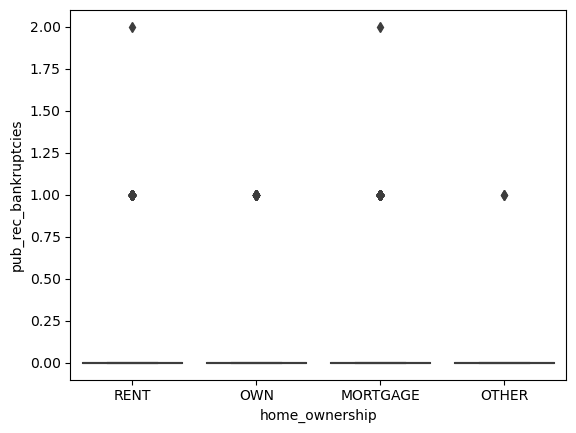

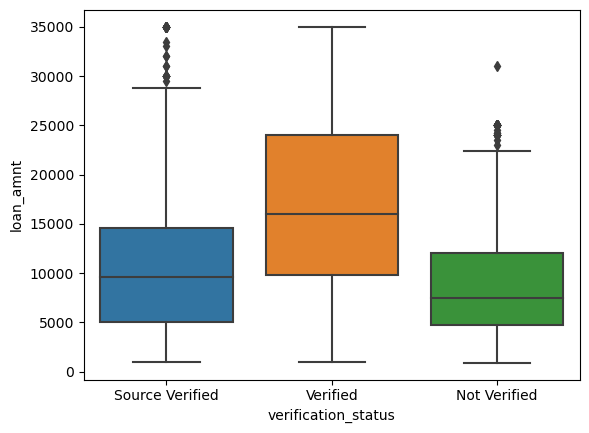

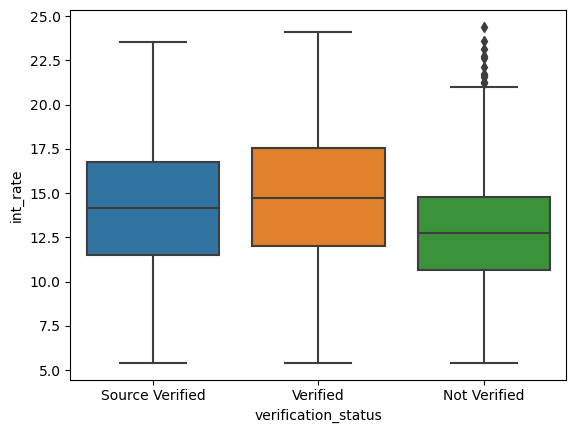

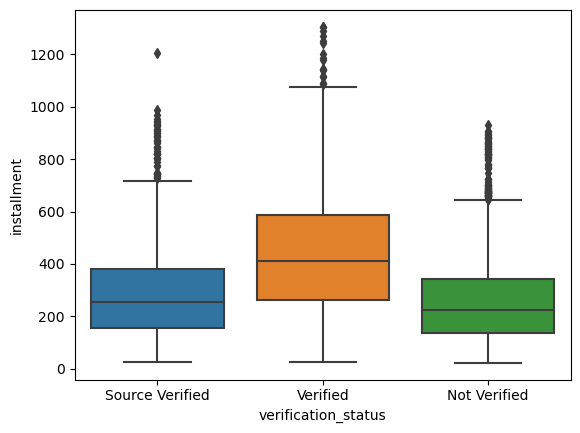

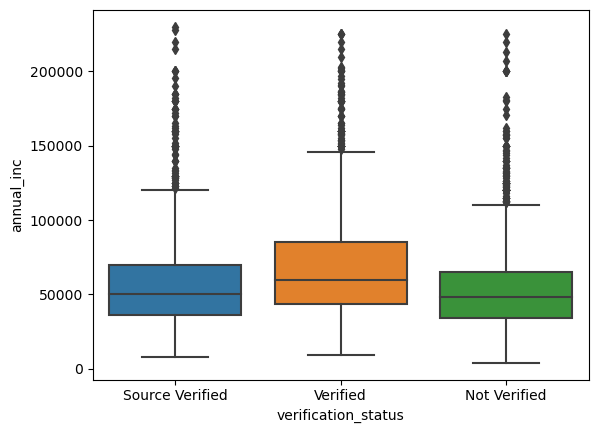

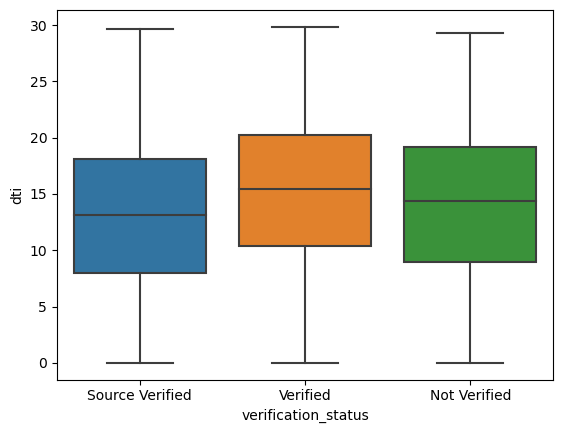

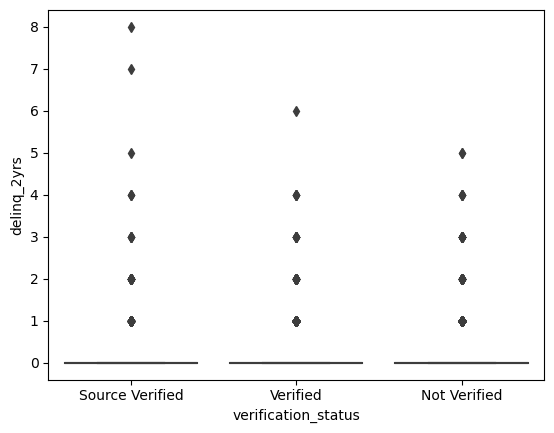

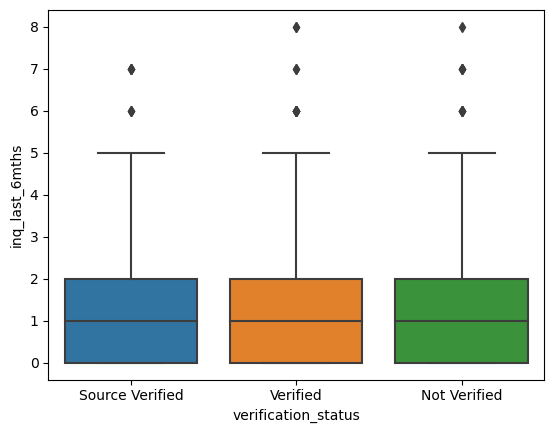

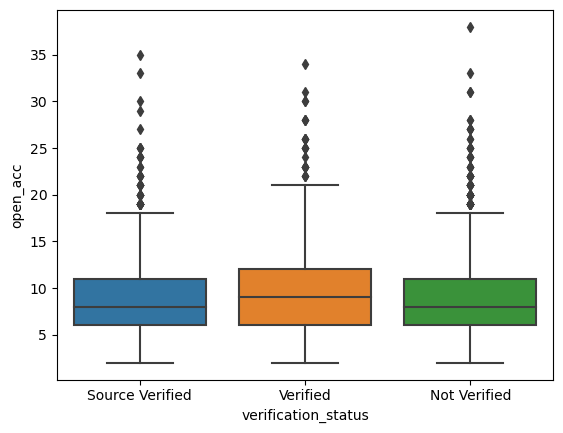

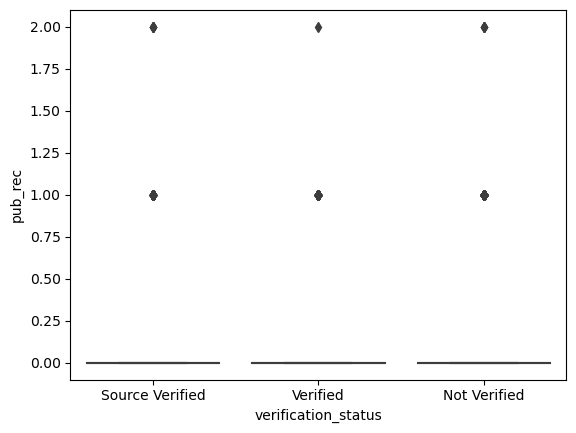

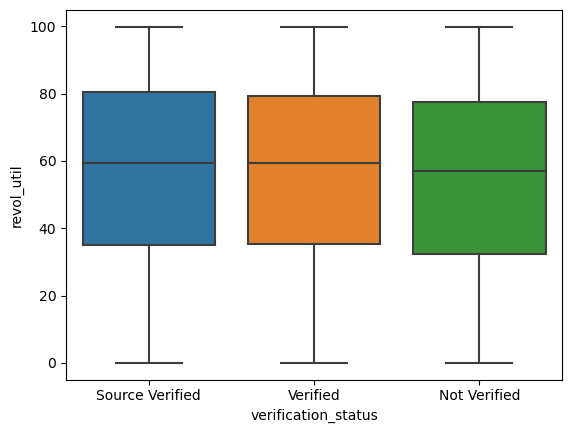

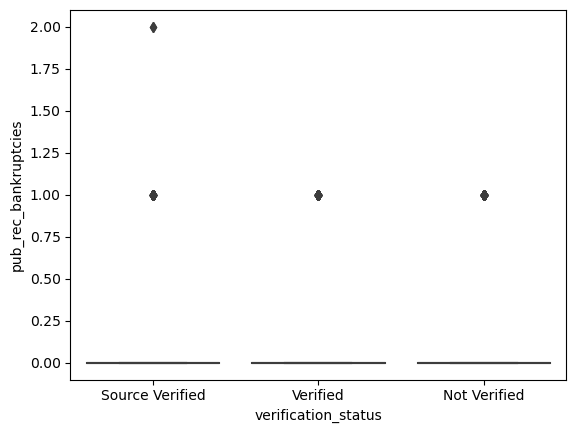

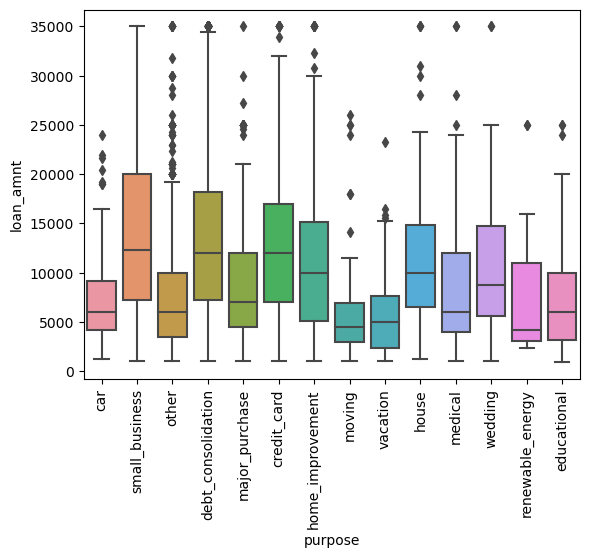

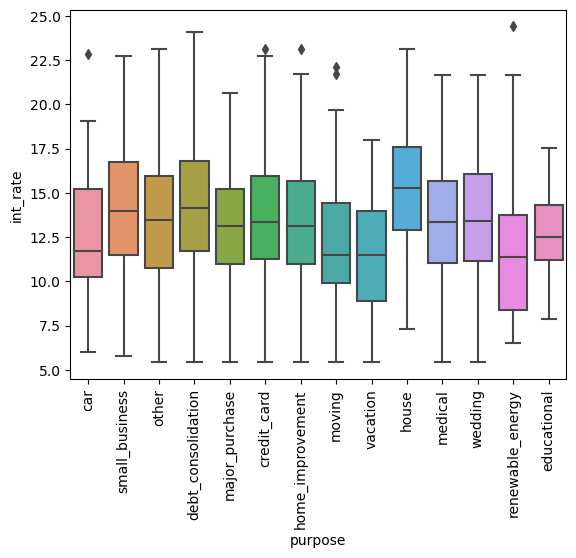

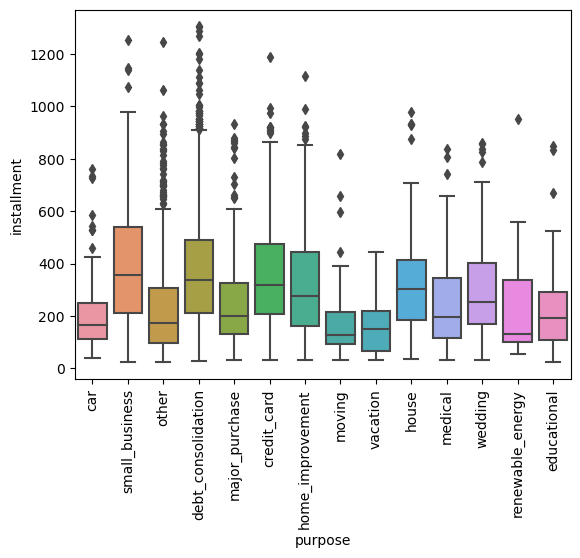

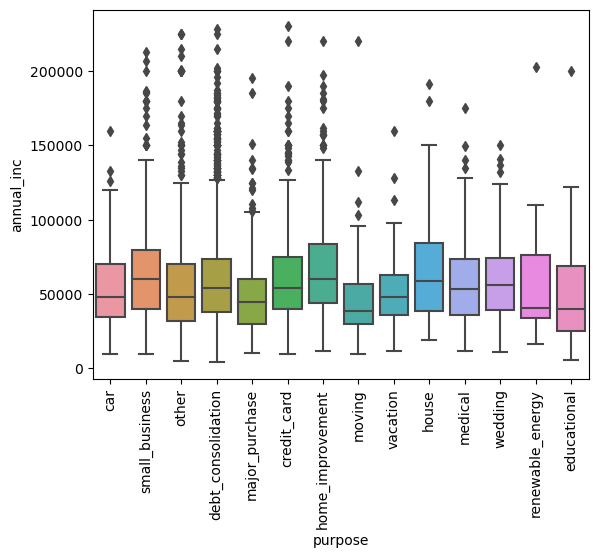

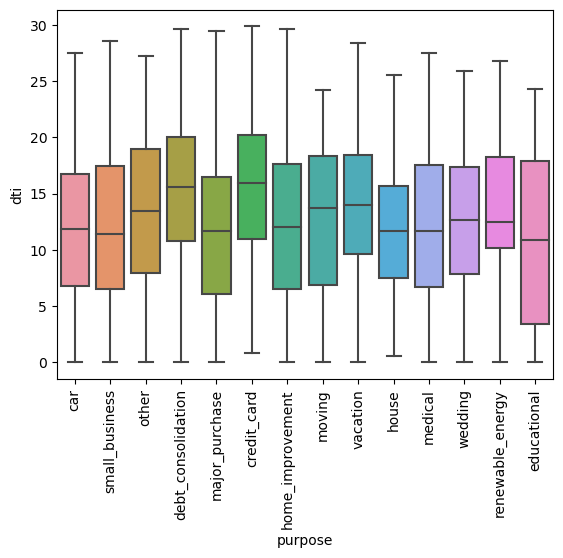

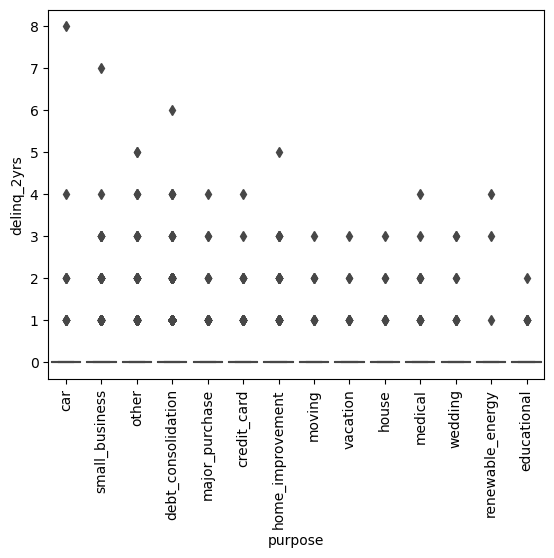

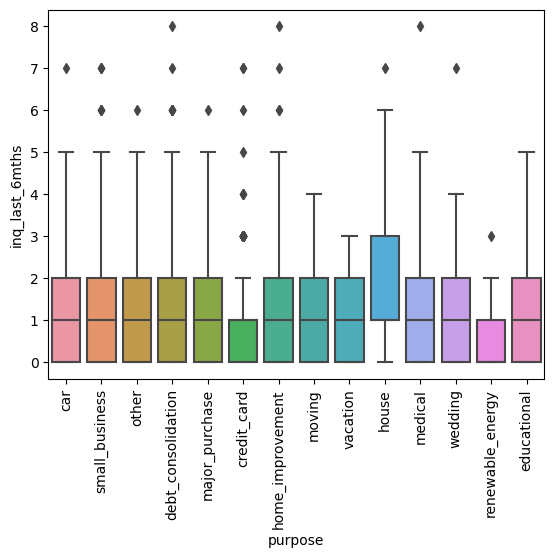

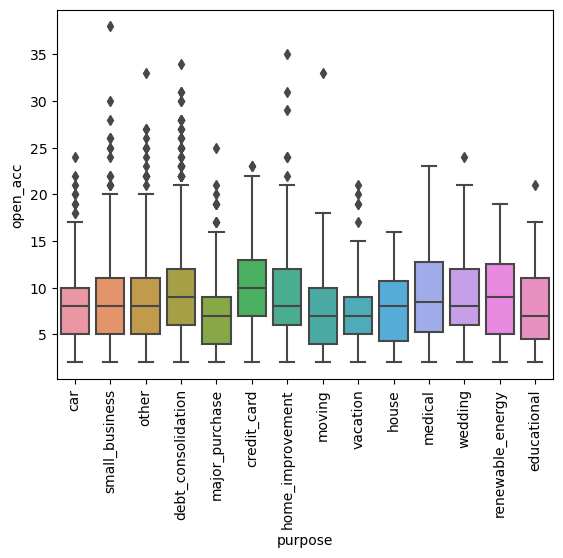

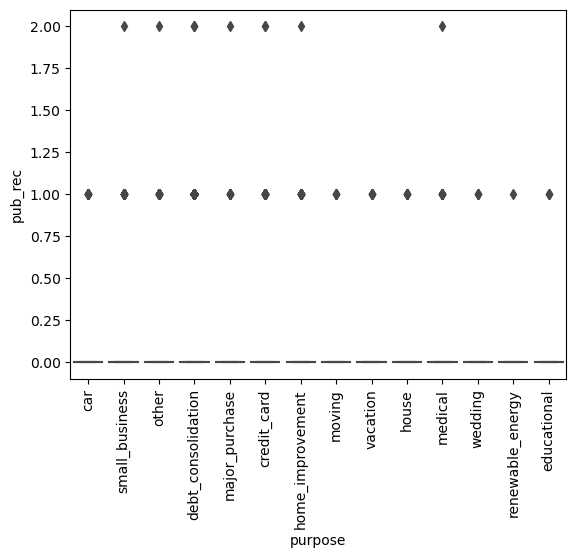

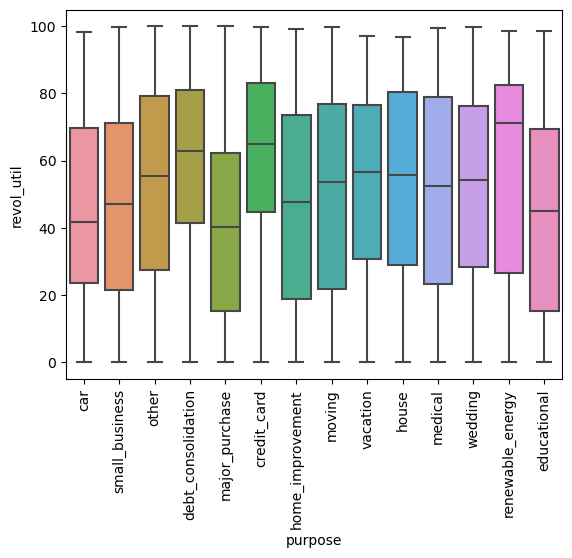

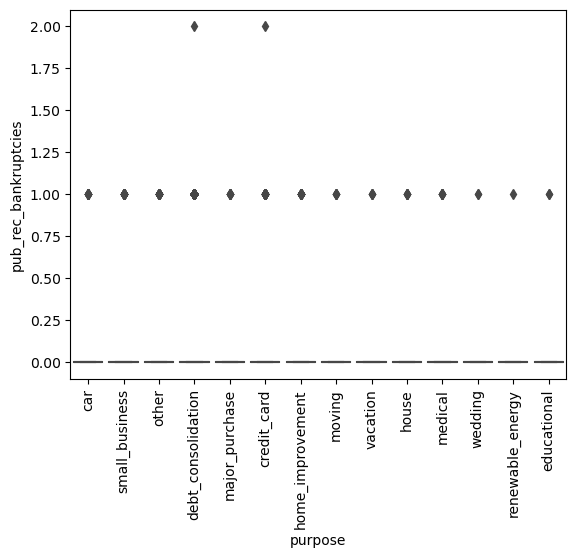

In [75]:
for col1 in cat_col1:
    for col2 in num_col:
        biv_num_cat(col1, col2)

Observations:
-  Borrowers choosing 60 months of tenure are going for higher amounts of loans, and more tenure usually results in more interest.
-  Higher-tenure loans have higher installments.
-  Borrowers with higher tenure have slightly more revolving credit utilisation.
-  Borrowers from F and G grades have higher loan amounts as well as higher interest rates.
-  Borrowers from F and G grades are from higher income groups.
-  Borrowers in Grade G have a greater spread of open accounts.
-  Borrowers with mortgages also have high loan amounts.
-  Income-verified borrowers are approved for larger amounts of loans.
-  More loans have been approved for the purposes of small businesses, followed by debt consolidation.

### 3.2.3 Categorical Vs Categorical

In [76]:
#Considering only a few numerical columns

num_col1 = ['loan_amnt','int_rate','installment','annual_inc','inq_last_6mths','open_acc','revol_util','pub_rec_bankruptcies']

In [77]:
cat_col1.append('addr_state')

In [78]:
cat_col1

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state']

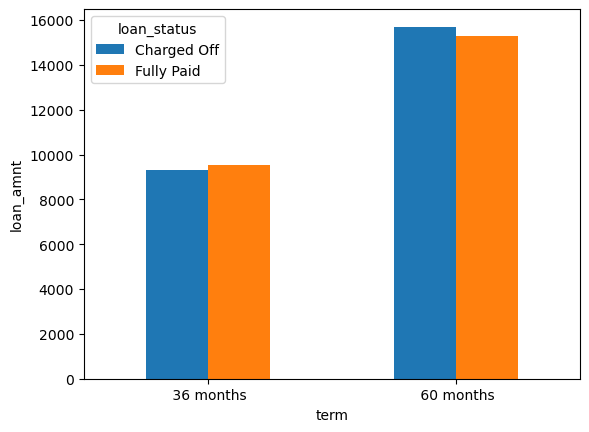

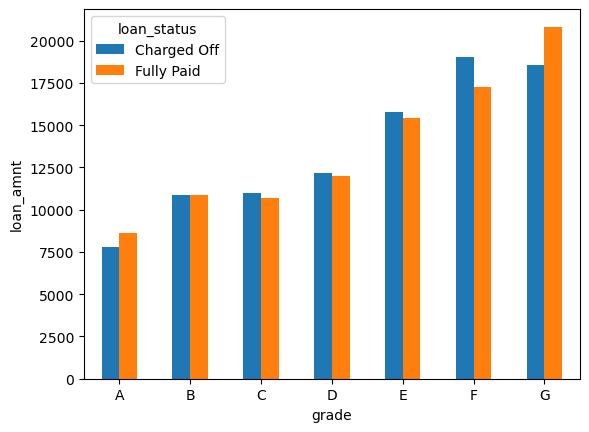

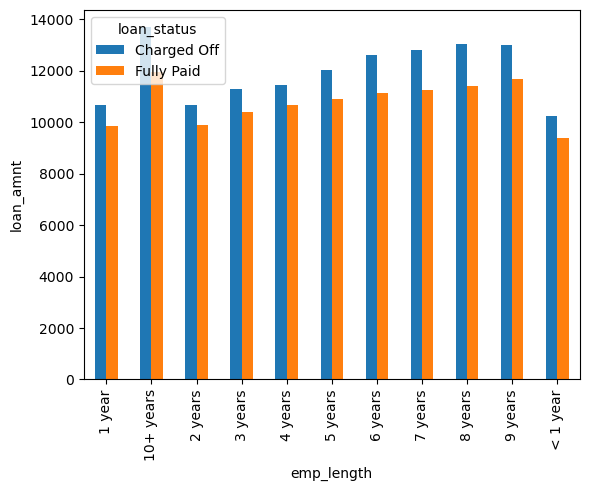

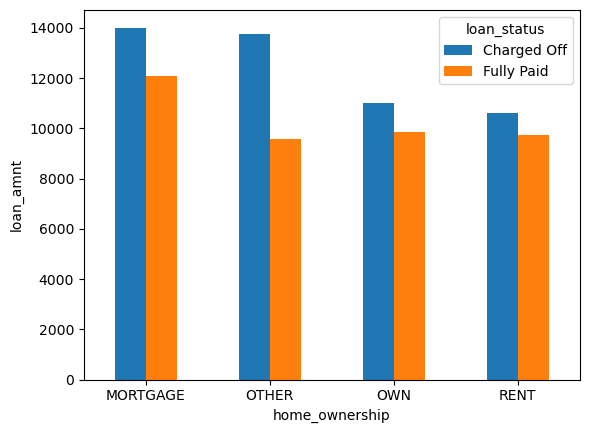

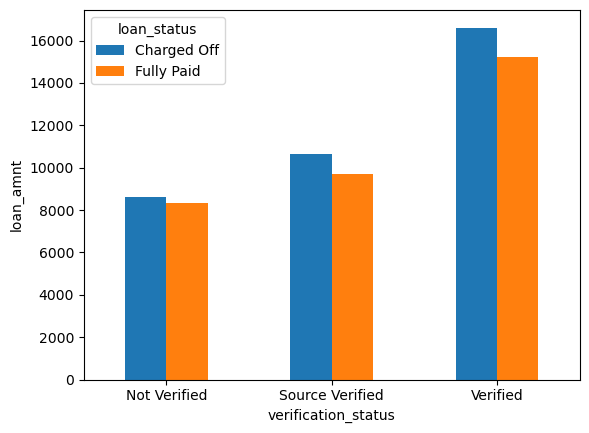

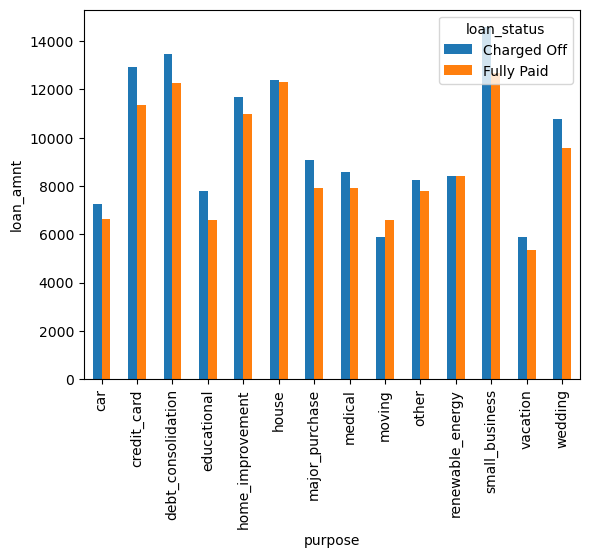

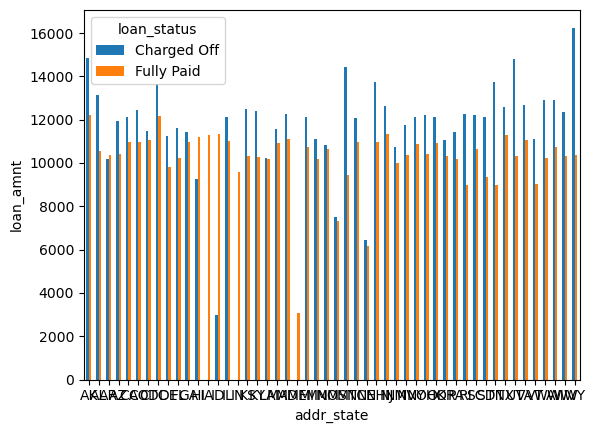

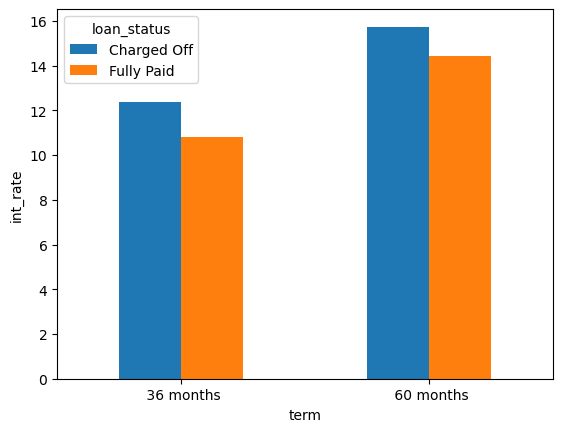

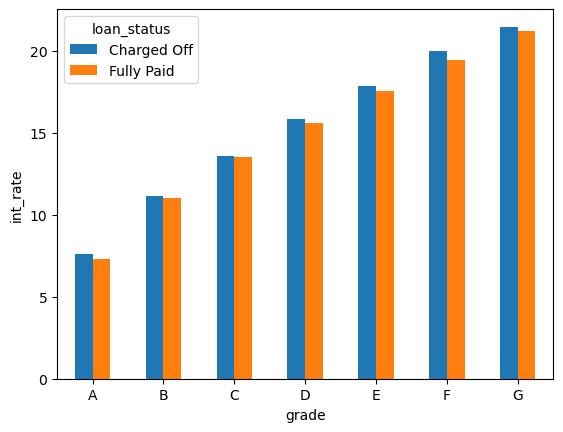

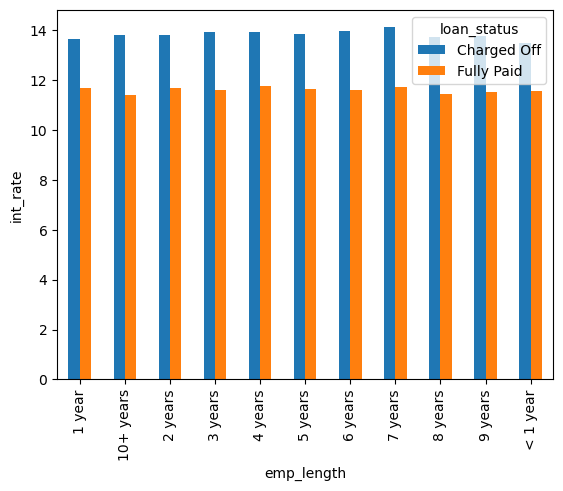

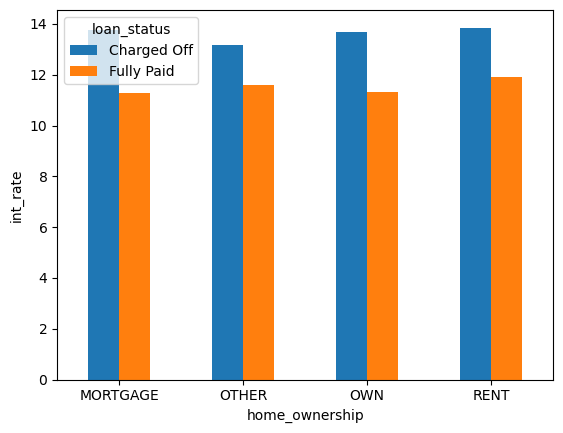

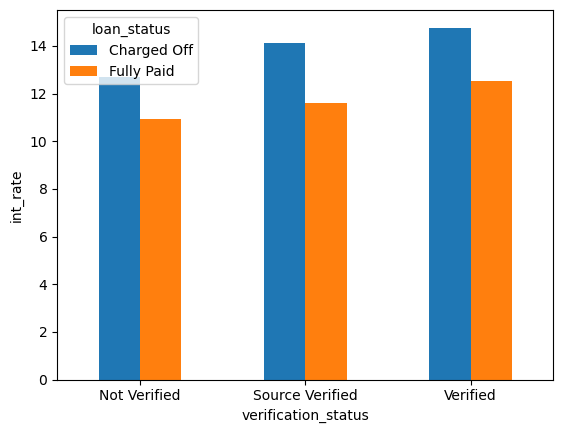

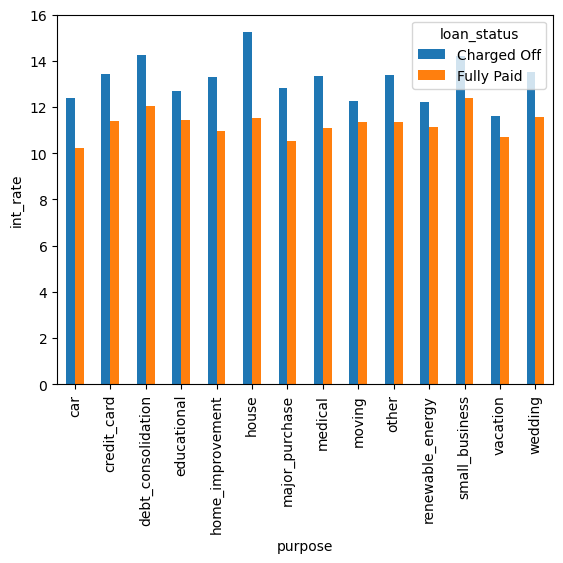

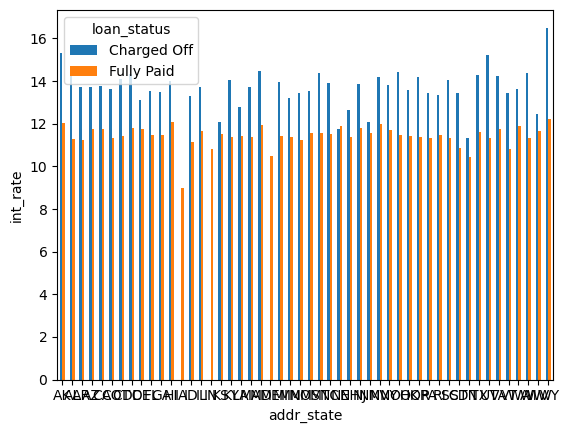

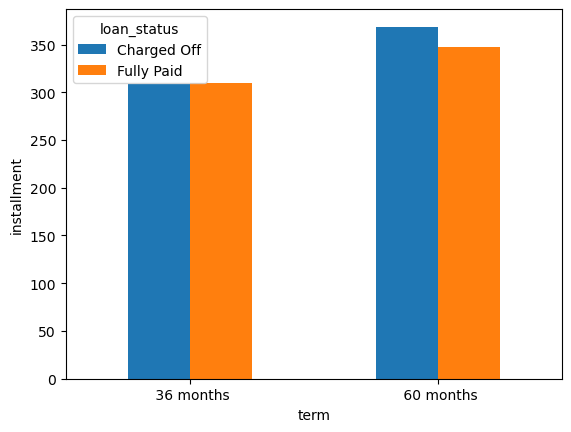

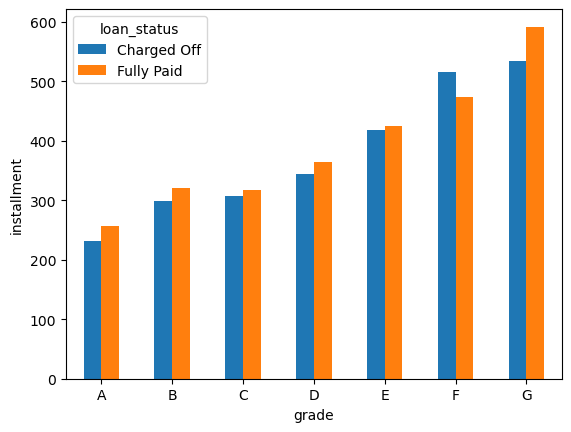

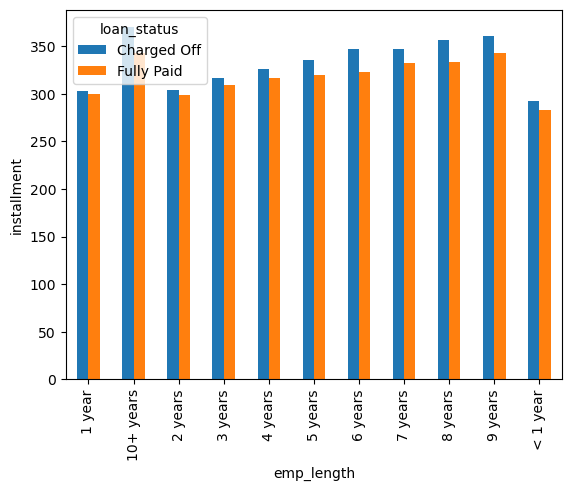

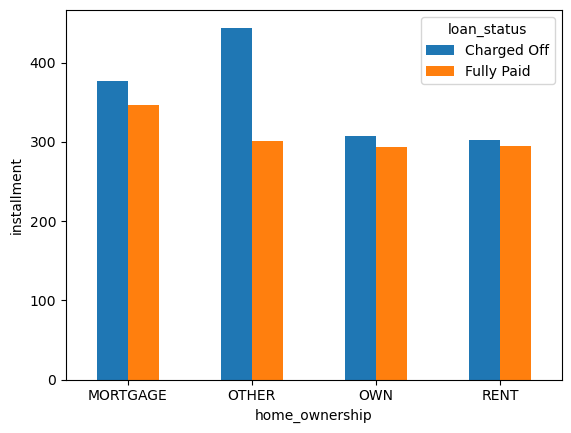

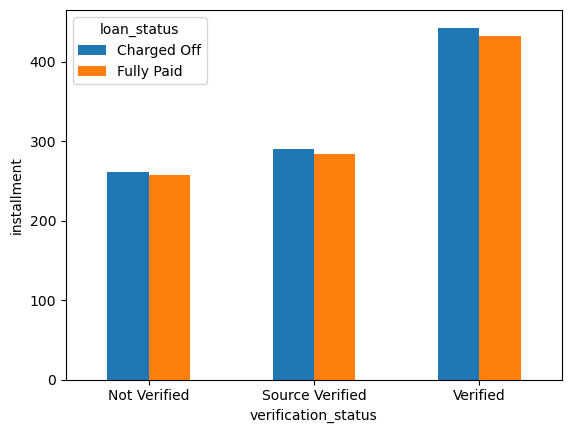

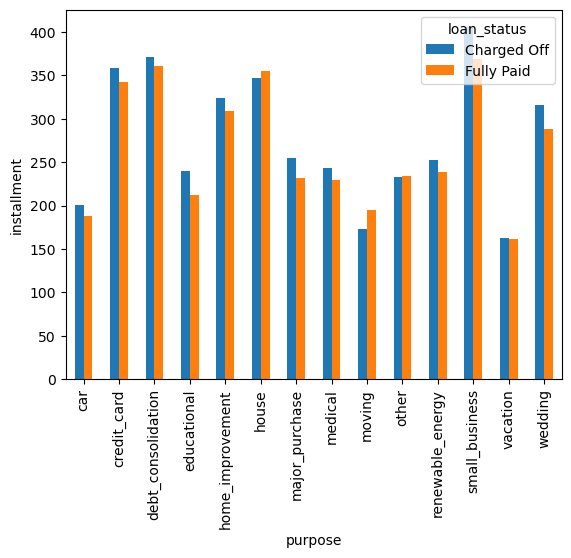

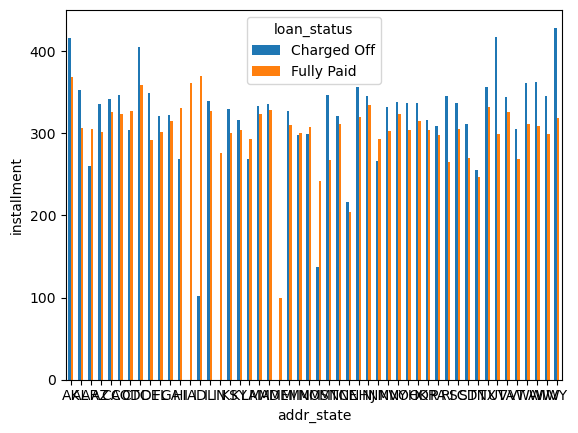

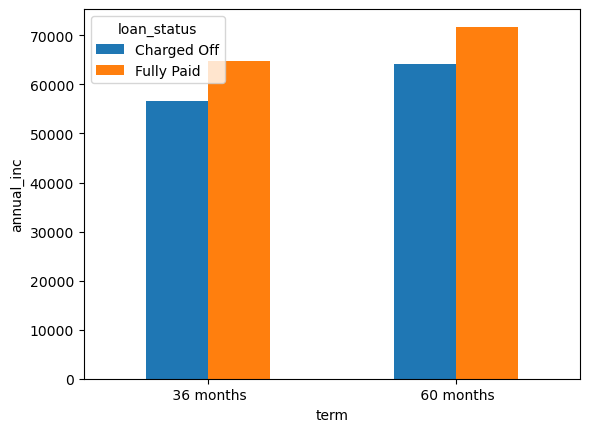

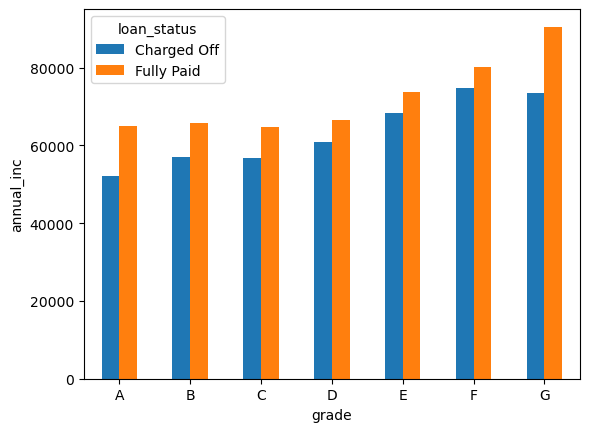

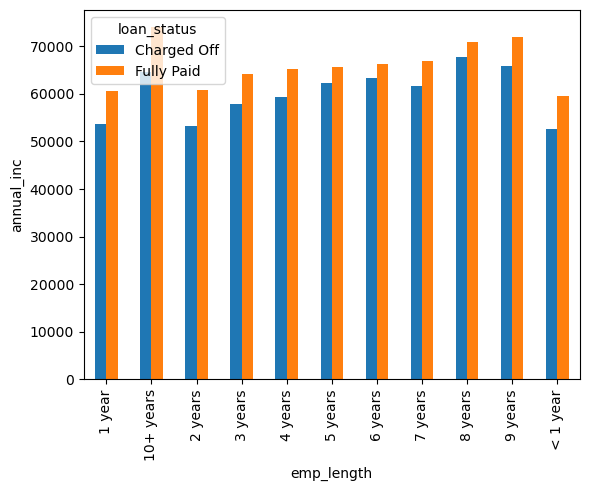

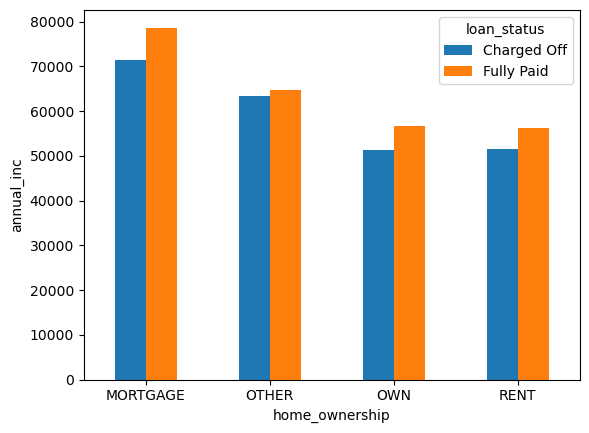

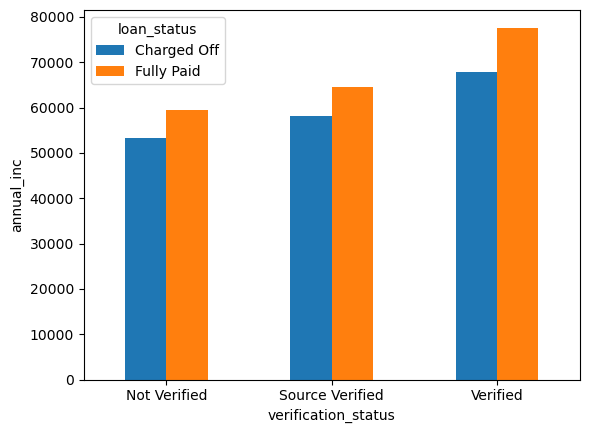

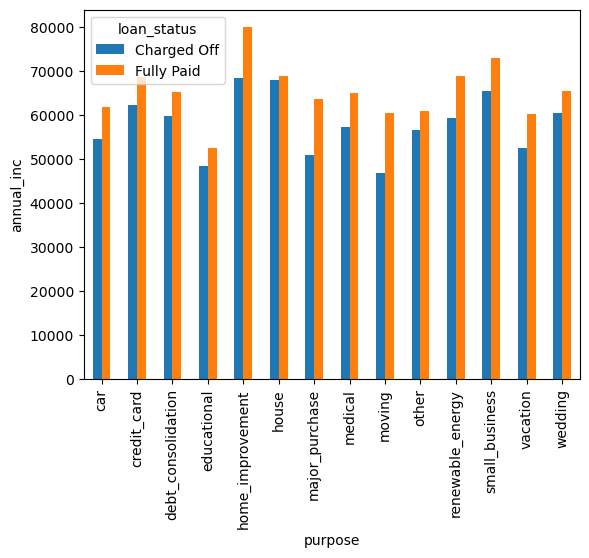

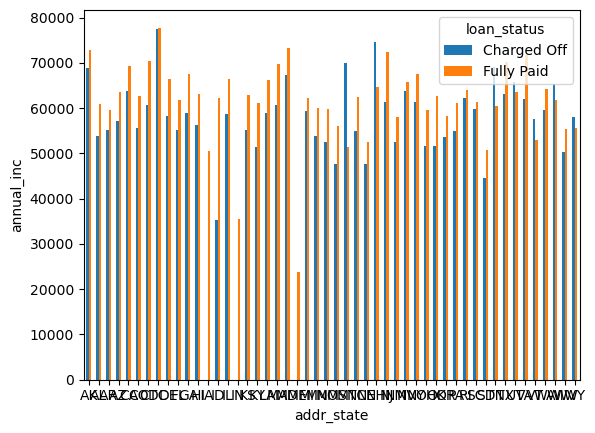

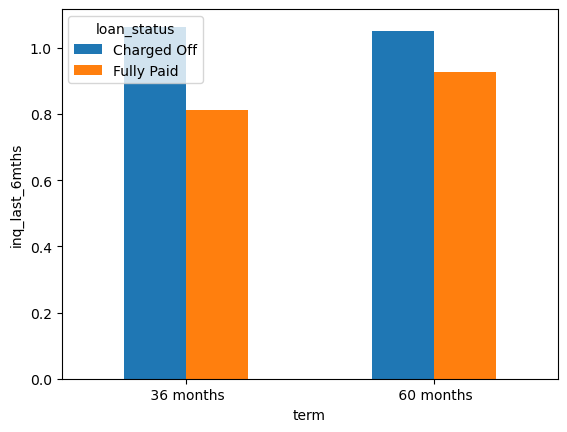

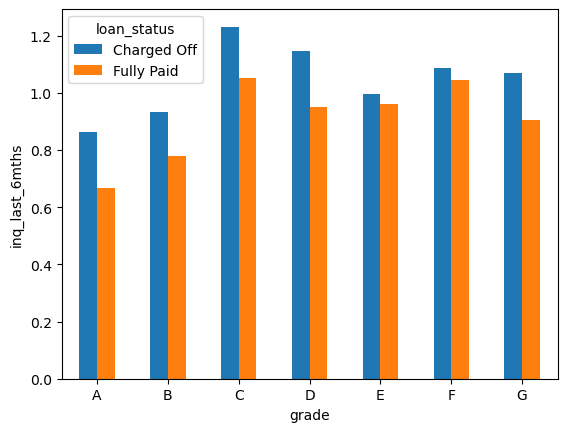

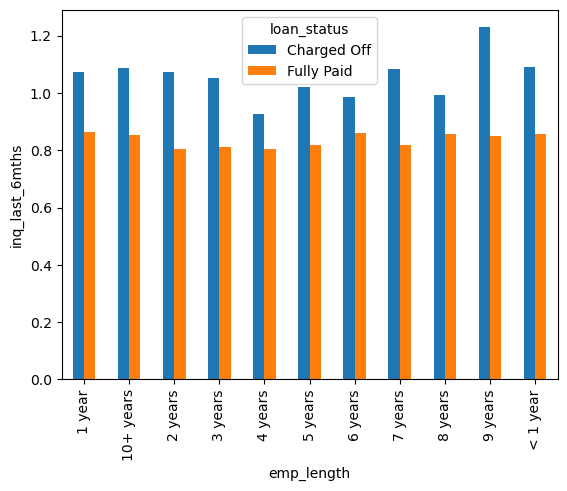

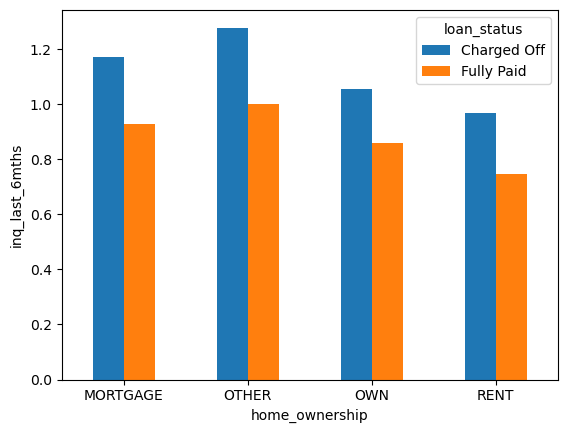

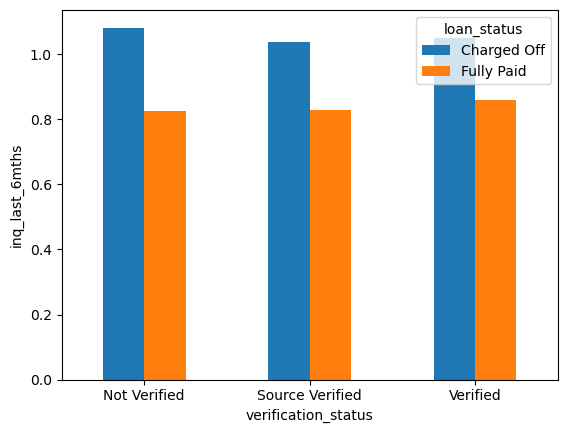

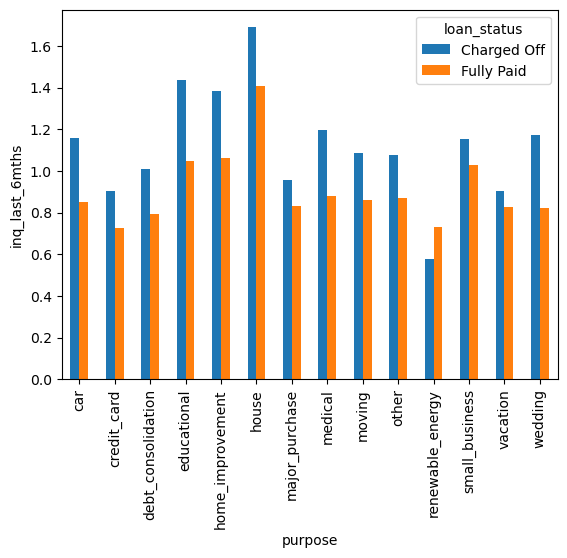

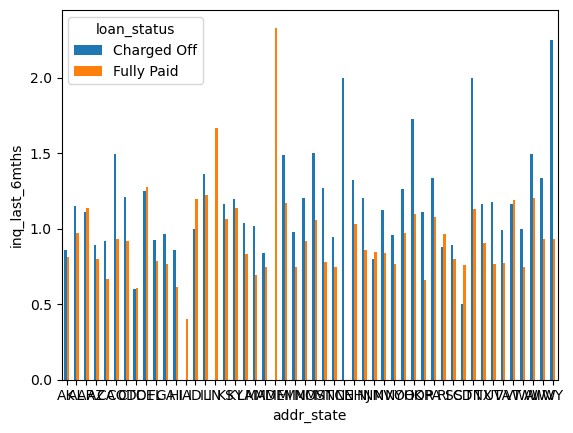

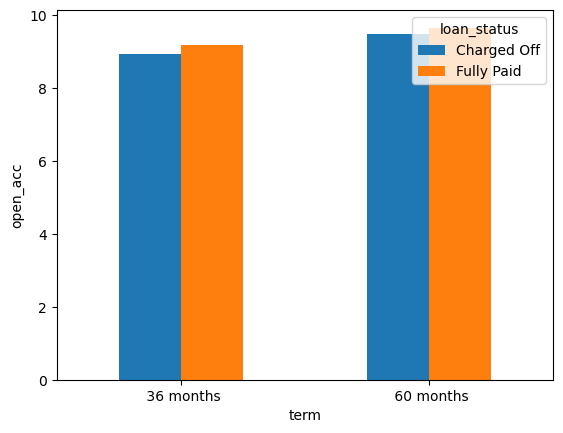

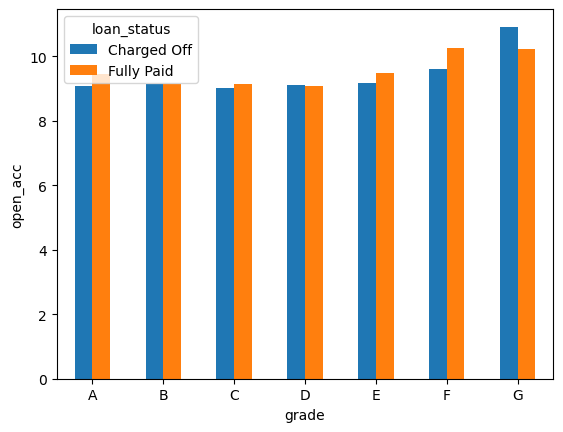

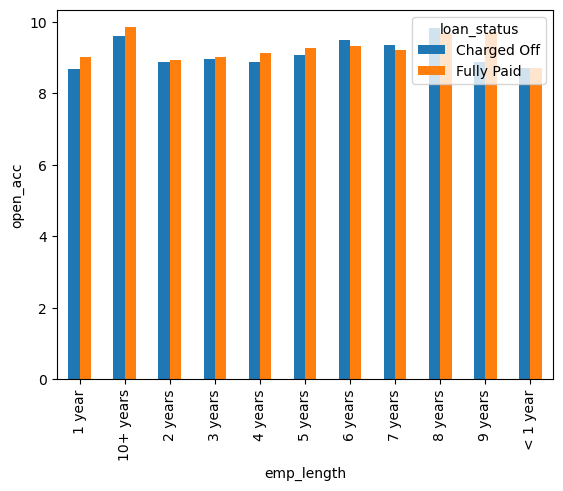

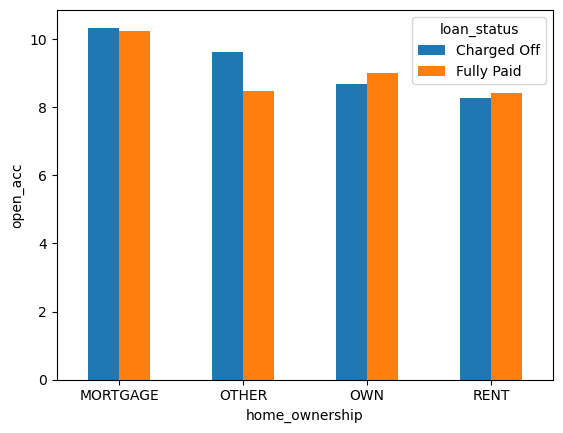

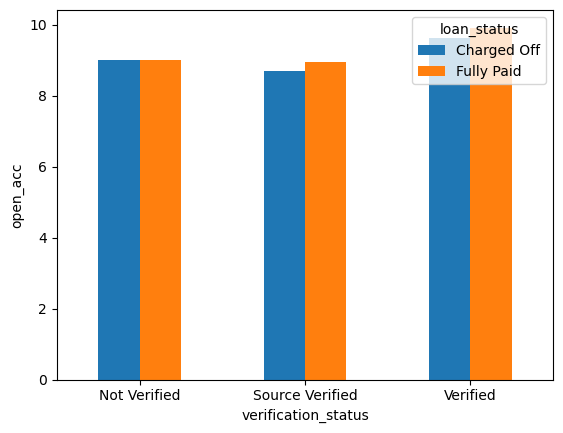

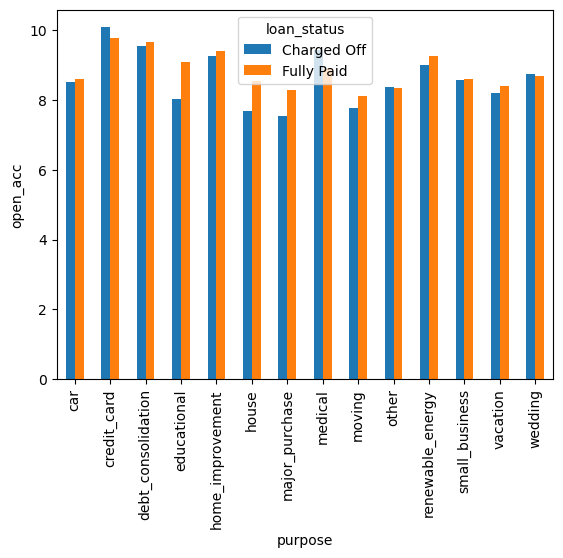

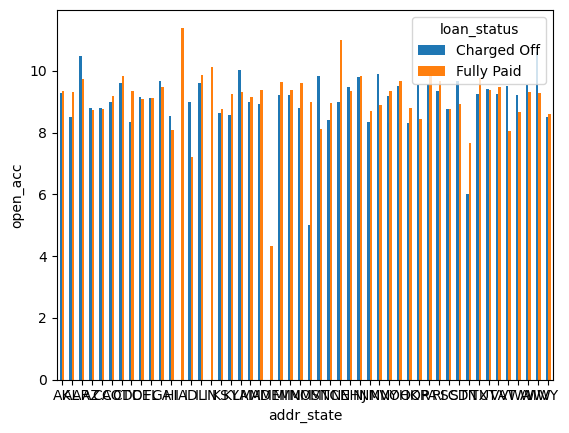

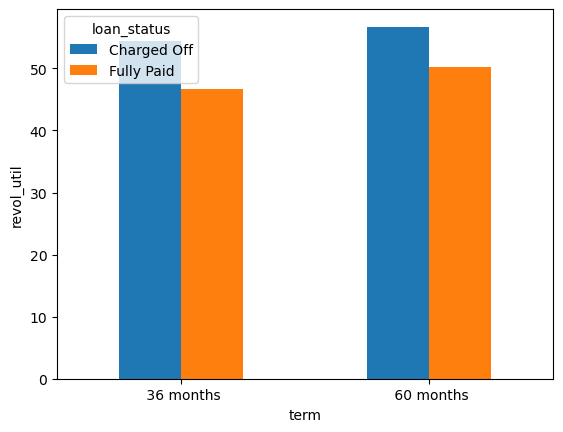

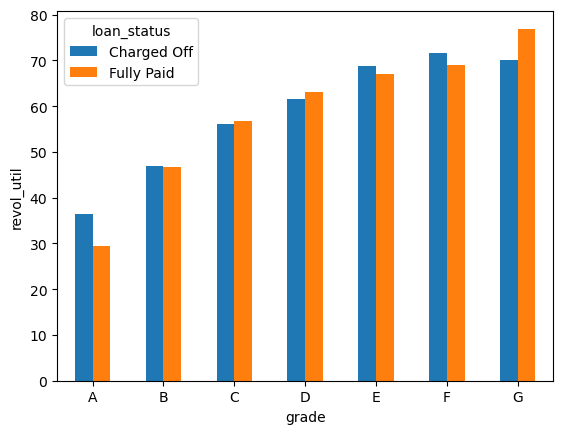

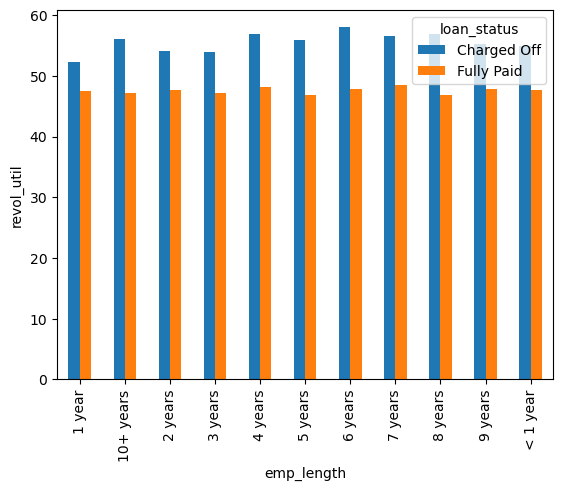

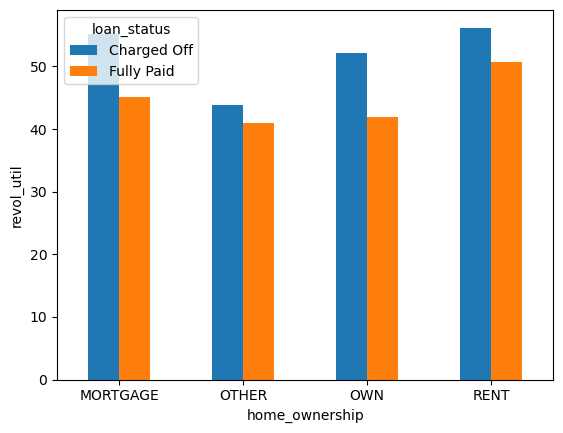

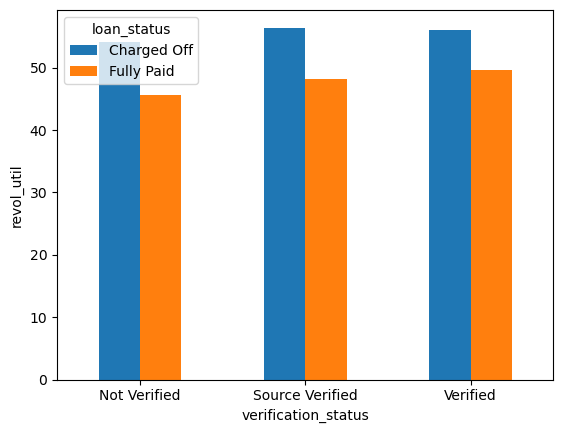

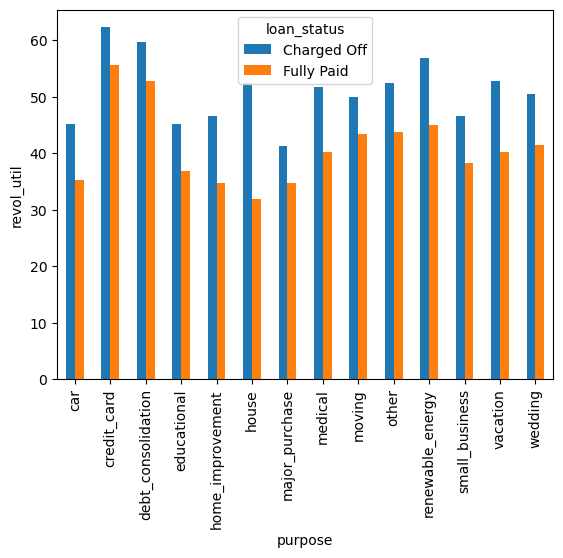

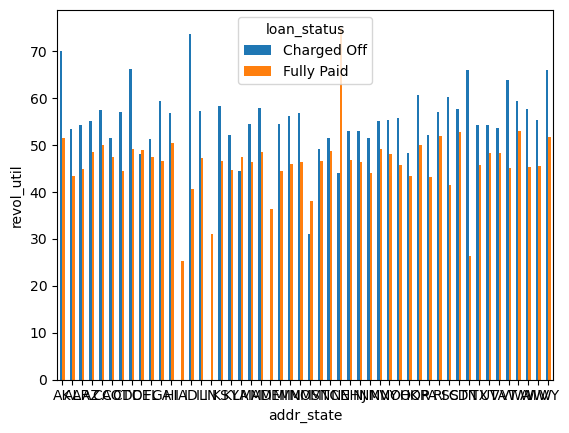

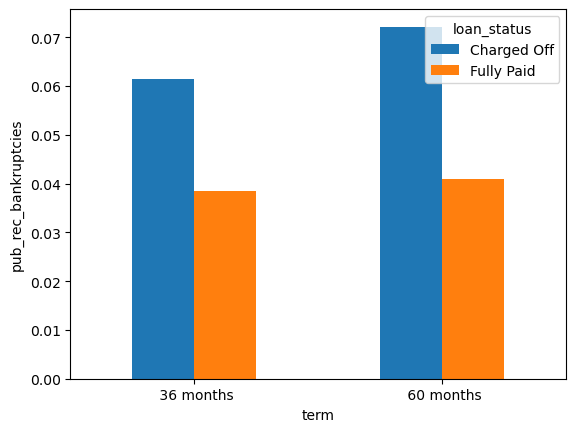

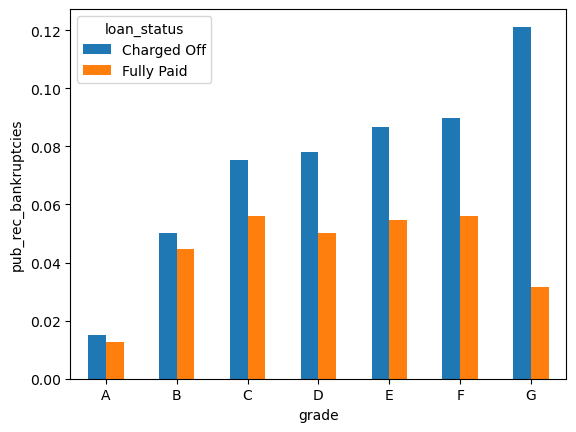

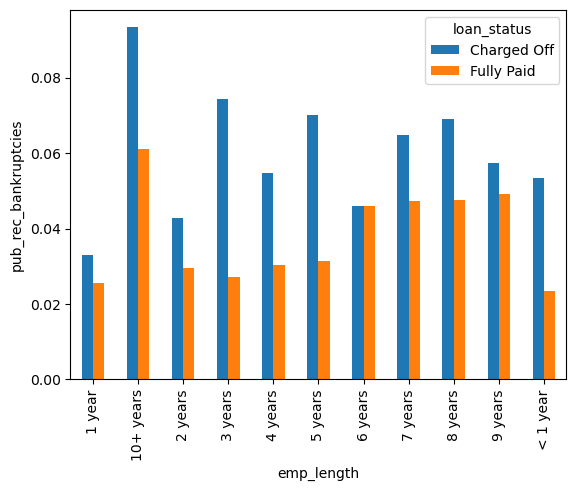

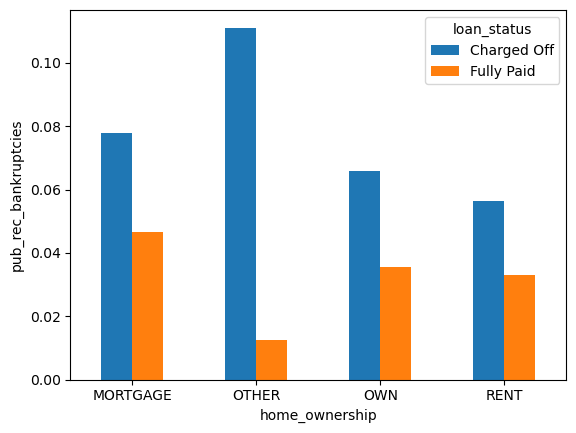

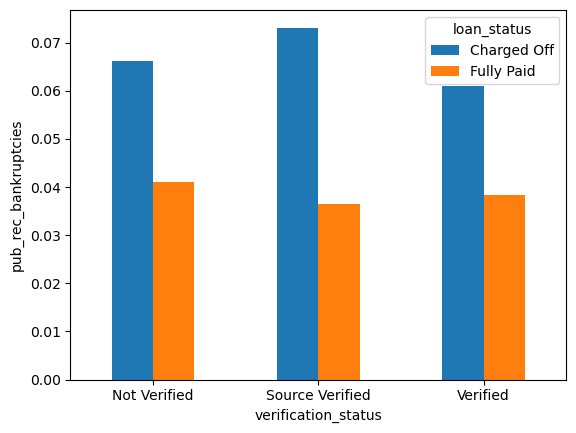

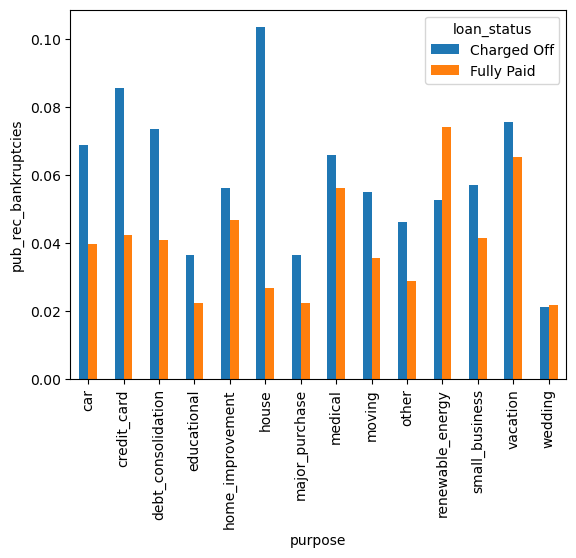

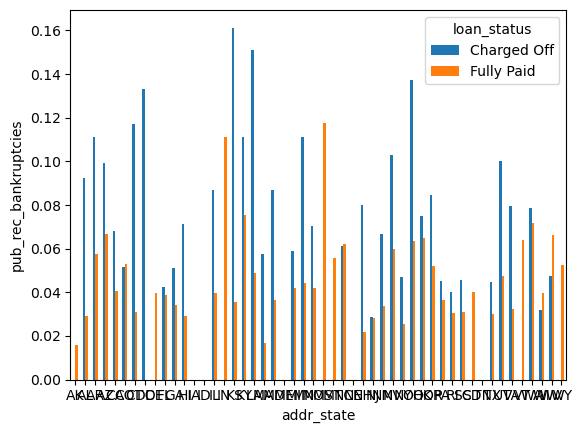

In [79]:
for col1 in num_col1:
    for col2 in cat_col1:
        piv1 = df1.pivot_table(index=col2, columns='loan_status', values=col1, aggfunc=np.mean)
        piv1.plot.bar()
        plt.ylabel(col1)
        if col2 not in ('emp_length','purpose'):
            plt.xticks(rotation=0)
        plt.show()

Observations:
-  A higher loan amount and a longer tenure are strong indications of their loan default.
-  Grade F borrowers with higher loan amounts are likely to default on their loan.
-  Verified borrowers tend to take a larger amount of loan, and they are also likely to default.
-  Grade G borrowers with higher interest rates are likely to default.
-  Borrowers with mortgages or who live in a rental house have high interest rates and are likely to default.
-  Experienced people with higher installations are likely to default.
-  Grade F borrowers with higher annual income are likely to default.
-  Most experienced people with higher annual incomes are more likely to pay off their loans.
-  Borrowers choosing 36-month tenure and more inquiries in the last 6 months are more likely to default.
-  Grade C borrowers with more inquiries in the last 6 months are more likely to default.
-  9 years of experience with having more inquiries in the last 6 months makes them more likely to default.
-  home ownership, as other and more inquiries in the last 6 months are more likely to default.
-  House purpose and more inquiries in the last 6 months are more likely to default.
-  Grade G borrowers with more open accounts are more likely to default.
-  Borrowers on mortgages with more open accounts are more likely to default.
-  Loans taken for debt consolidation with more open accounts are more likely to default.
-  Credit cards with higher revolving balance utilisation are more likely to default.
-  Higher tenure and more public-record bankruptcies are indications of default.
-  Grade G borrower and more public record bankruptcies are indications of default.
-  Most experienced borrowers and more public record bankruptcies are indications of default.
-  Home ownership, as other and more public record bankruptcies indicate, is an indication of default.
-  House purpose and more public record bankruptcies are indications of default.

## 3.3 Derived Metrics

In [80]:
df1['int_rate_bins'] = pd.qcut(x= df1.int_rate, q=[0,0.2,0.4,0.6,0.8,1], labels=['VL','L','M','H','VH'])
df1.head(2)

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   

       purpose addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  credit_card         AZ 27.65            0           Jan-85               1   
1          car         GA  1.00            0           Apr-99               5   

   open_acc  pub_rec  revol_util  pub_rec_bankruptcies int_rate_bins  
0         3        0       83.70                  0.00             L  
1         3        0        9.40                  0.00            VH

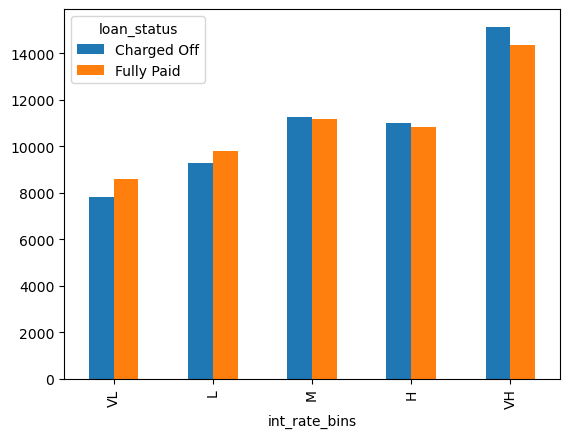

In [81]:
piv5 = df1.pivot_table(index='int_rate_bins', columns='loan_status', values='loan_amnt', aggfunc=np.mean)
piv5.plot.bar()
plt.show()

`Very high loan amounts with very high interest rate are more likely to default`

In [82]:
df1['annual_inc_bins'] = pd.qcut(x= df1.annual_inc, q=[0,0.2,0.4,0.6,0.8,1], labels=['VL','L','M','H','VH'])
df1.head(2)

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   

       purpose addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  credit_card         AZ 27.65            0           Jan-85               1   
1          car         GA  1.00            0           Apr-99               5   

   open_acc  pub_rec  revol_util  pub_rec_bankruptcies int_rate_bins  \
0         3        0       83.70                  0.00             L   
1         3        0        9.40                  0.00            VH   

  annual_inc_bins  
0              VL  
1              VL

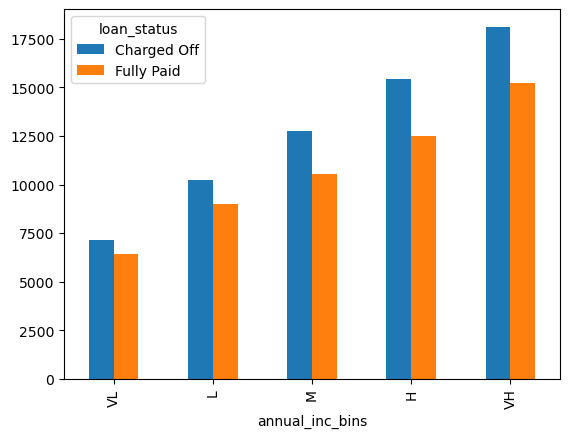

In [83]:
piv6 = df1.pivot_table(index='annual_inc_bins', columns='loan_status', values='loan_amnt', aggfunc=np.mean)
piv6.plot.bar()
plt.show()

`Borrower having higher amount incomes tend to take higher loans also tend to default as well`

In [84]:
## Extracting the issue month and year for all the loans

mnth = lambda x : x.split("-")[0]
year = lambda x : x.split("-")[1]
df1['issue_month']=df1.issue_d.apply(mnth)                      
df1['issue_year']= df1.issue_d.apply(year) 


In [85]:
# Executing the below code again as we have updated the df1 dataframe

fully_paid = df1[df1.loan_status == 'Fully Paid']
charged_off = df1[df1.loan_status == 'Charged Off']

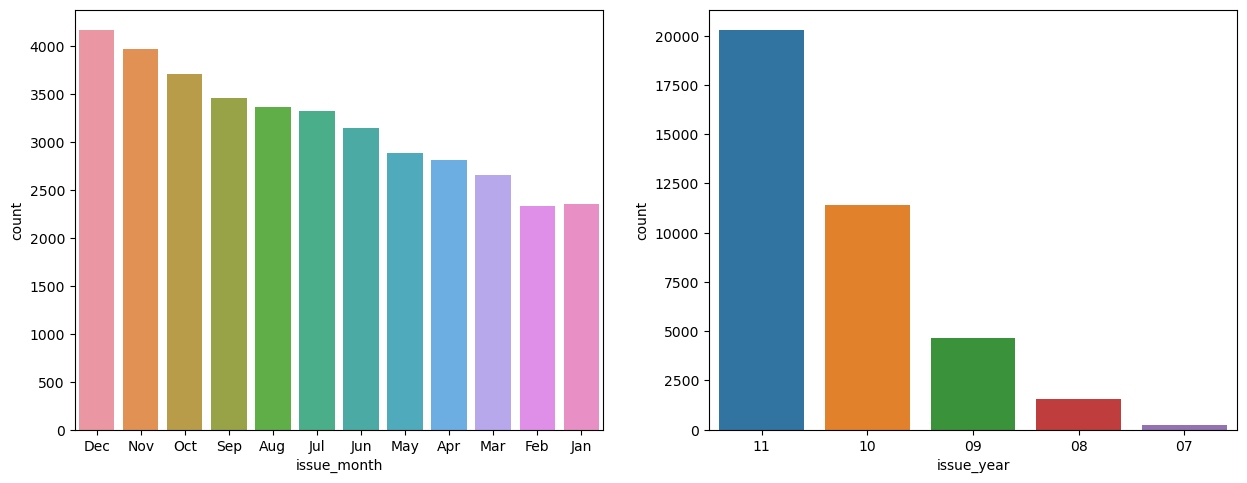

In [86]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.countplot(data=df1, x='issue_month')

plt.subplot(2,2,2)
sns.countplot(data=df1, x='issue_year')

plt.show()

Observations:
-  Most of the charged off loans were issued in the month of December followed by November
-  Loans issued in the year 2011 were charged 0ff